# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('product_sales.csv')
print(df.head())
print(df.isna().sum())
print(df.info())

   week  sales_method  ... nb_site_visits      state
0     2         Email  ...             24    Arizona
1     6  Email + Call  ...             28     Kansas
2     5          Call  ...             26  Wisconsin
3     4         Email  ...             25    Indiana
4     3         Email  ...             28   Illinois

[5 rows x 8 columns]
week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  flo

2. Data Validation and Cleaning Steps
Before analysis, the data was validated and cleaned to ensure accuracy and reliability. Below are the steps taken for each of the 8 columns:

Week:
Checked for missing values.
Removed rows with invalid or missing values

Sales Method:
Verified that all entries matched the predefined sales methods
Corrected typos and standardized naming conventions.

Customer ID:
Checked for duplicates and missing values.


Number Sold(nb_sold):
Removed rows with negative values
Filled negative/missing rows with the median value.

Revenue:
Checked for rows with negative and missing values
Filled negative/missing rows with the median value of each state.

Years as Customer:
Checked for rows missing values and negative rows.
Filled the negative/missing rows with the median value.

Number of Site Visits(nb_site_visits):
Checked for rows missing values and negative rows.
Filled the negative/missing rows with the median value.

State:
Ensured all values were valid US States. 
Corrected all typos and ensusres the states were spelt correctly

Initial rows: 15000
Number of unique values: 6
1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64
Number of missing weeks: 0
Number of incorrect weeks: 0


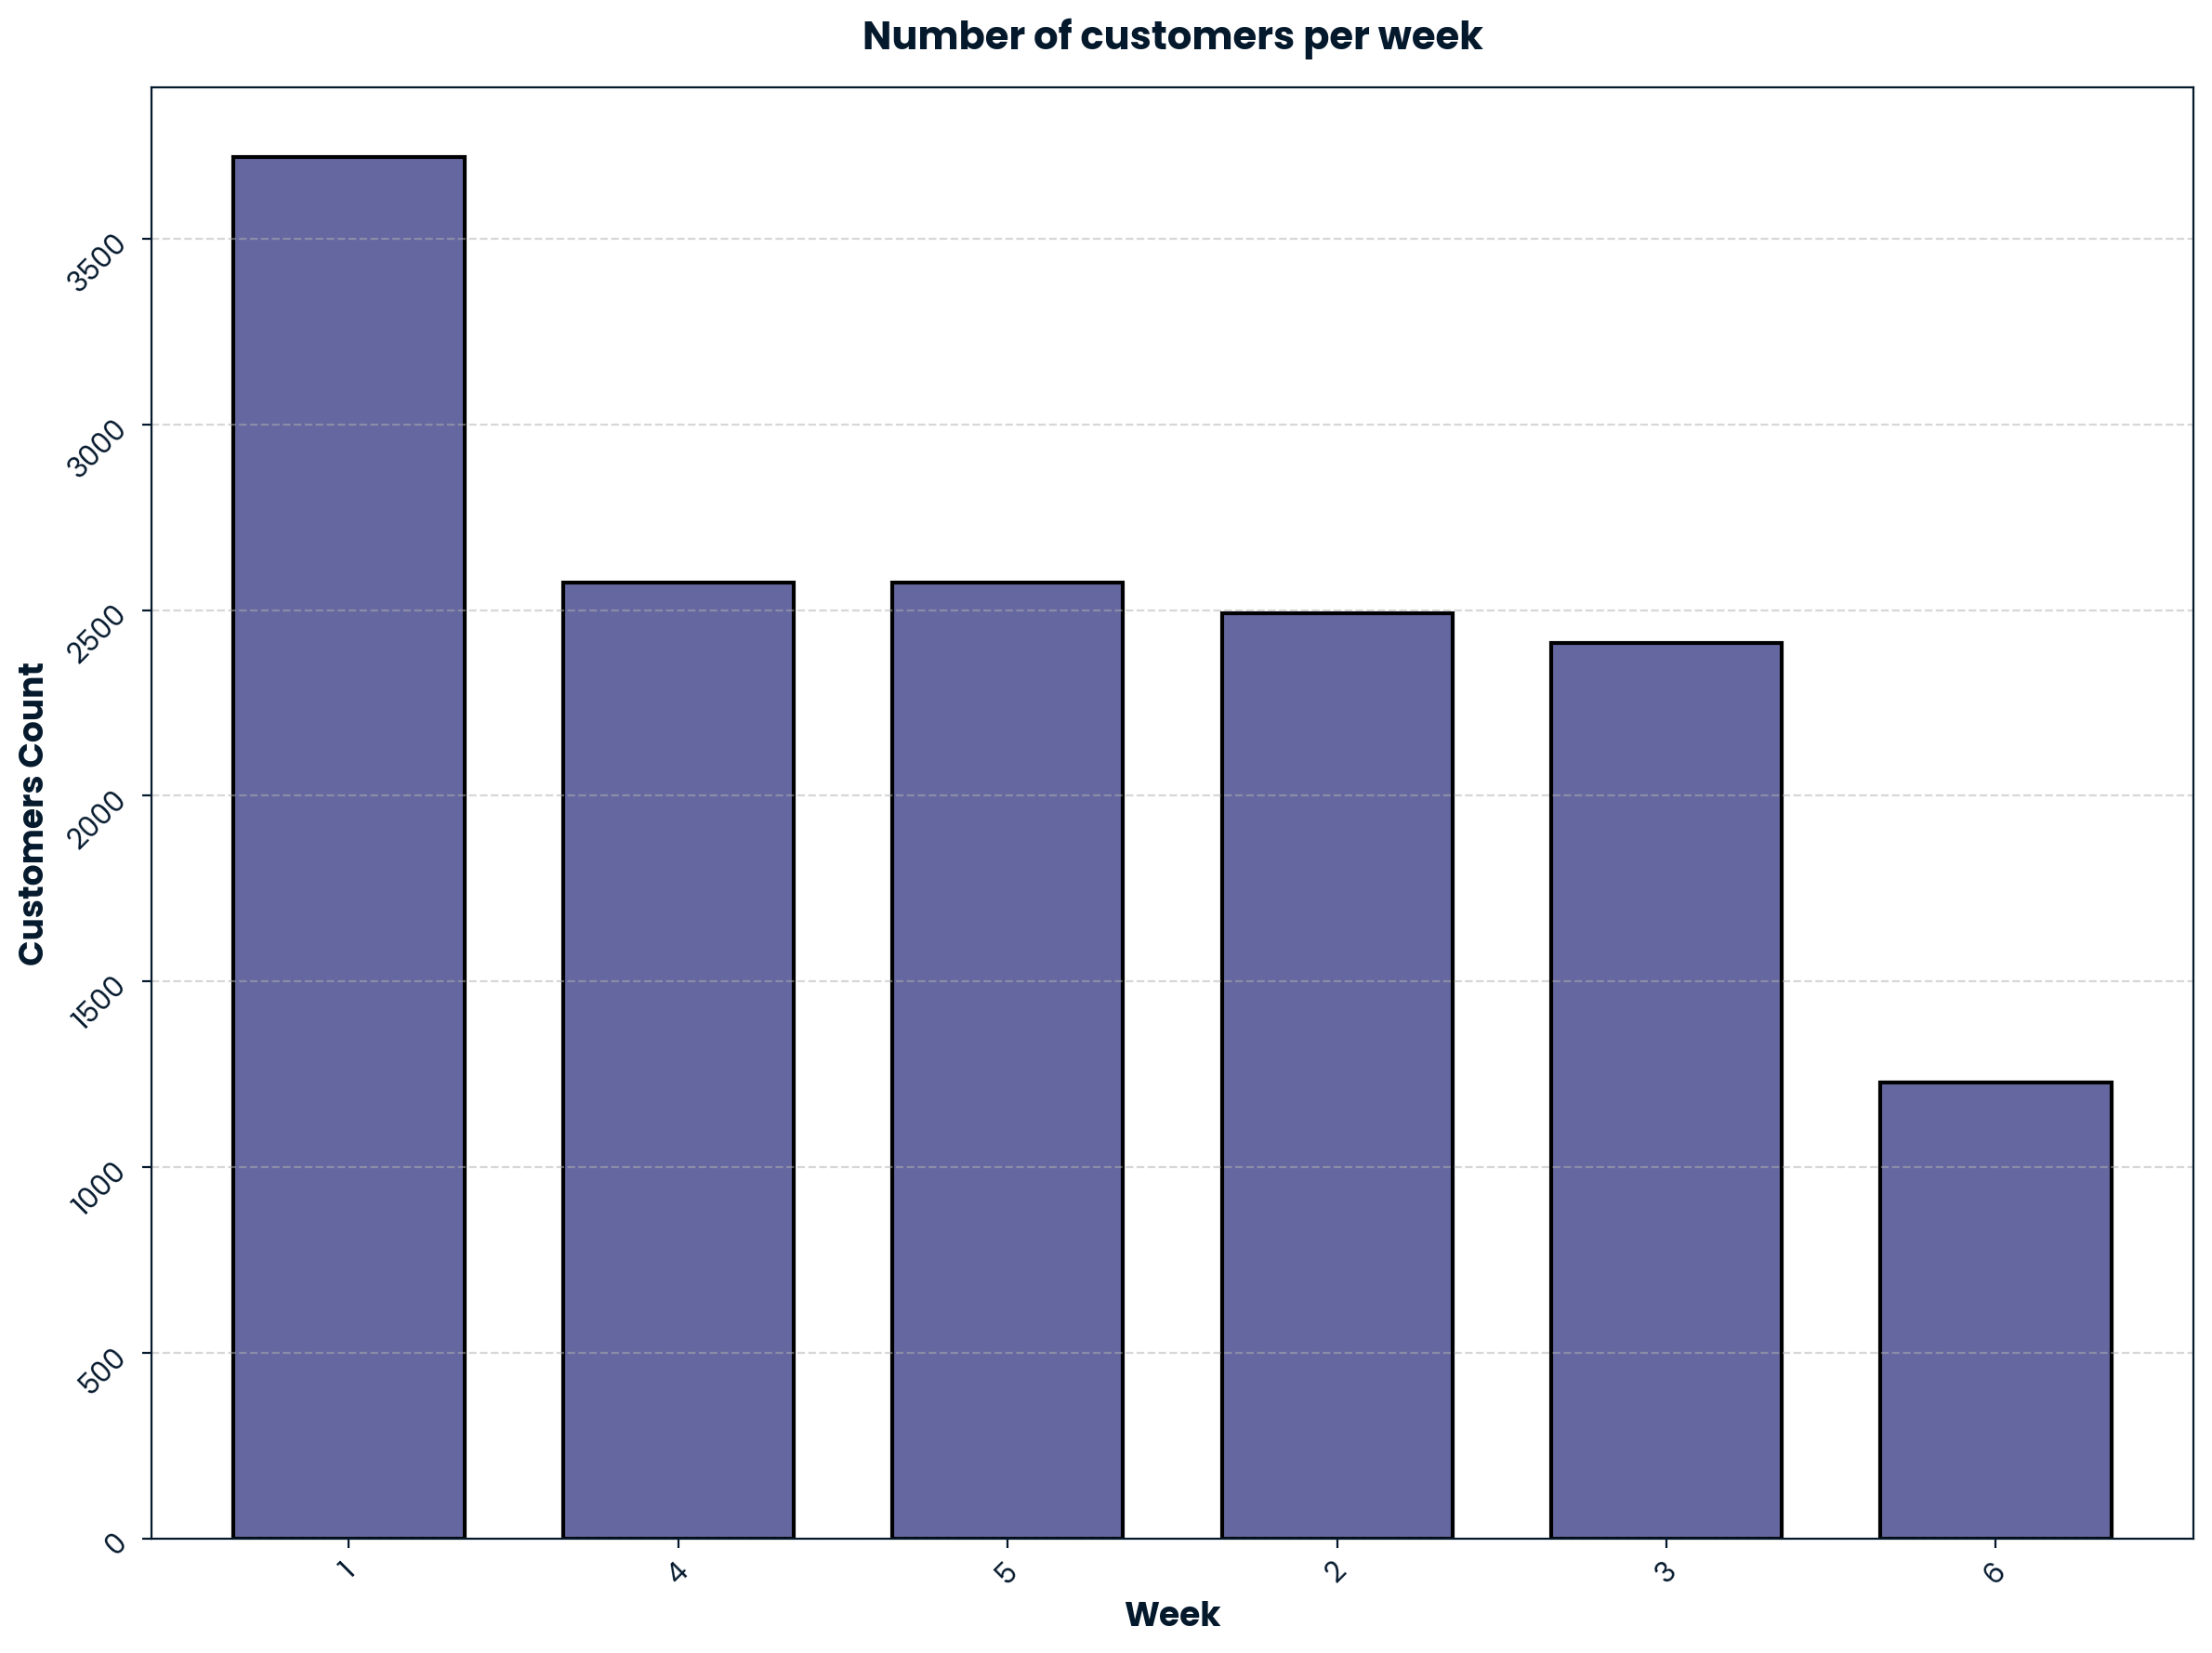

In [24]:
#Week column data cleaning
print('Initial rows:', len(df['week']))
print('Number of unique values:', df['week'].nunique())
#Inspect values of the week column
print(df['week'].value_counts())
#Check for missing weeks
missing_weeks = df['week'].isna().sum()
print('Number of missing weeks:', missing_weeks) 
#Check for incorrect weeks
incorrect_weeks = df[(df['week'] < 1) | (df['week'] > 6)].shape[0]
print('Number of incorrect weeks:', incorrect_weeks)
#Plotting the distribution of weeks
plt.figure(figsize=(12,9))
df['week'].value_counts().plot(kind='bar', edgecolor='black',linewidth=1.5, width=0.7)
plt.xlabel('Week', fontsize=13, fontweight='bold')
plt.ylabel('Customers Count', fontsize=13, fontweight='bold')
plt.title('Number of customers per week', fontsize=15, fontweight='bold', pad=15)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(rotation=45, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Initial rows: 15000
Unique values:  5
Value counts before cleaning:
 Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64
Value counts after cleaning:
 Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


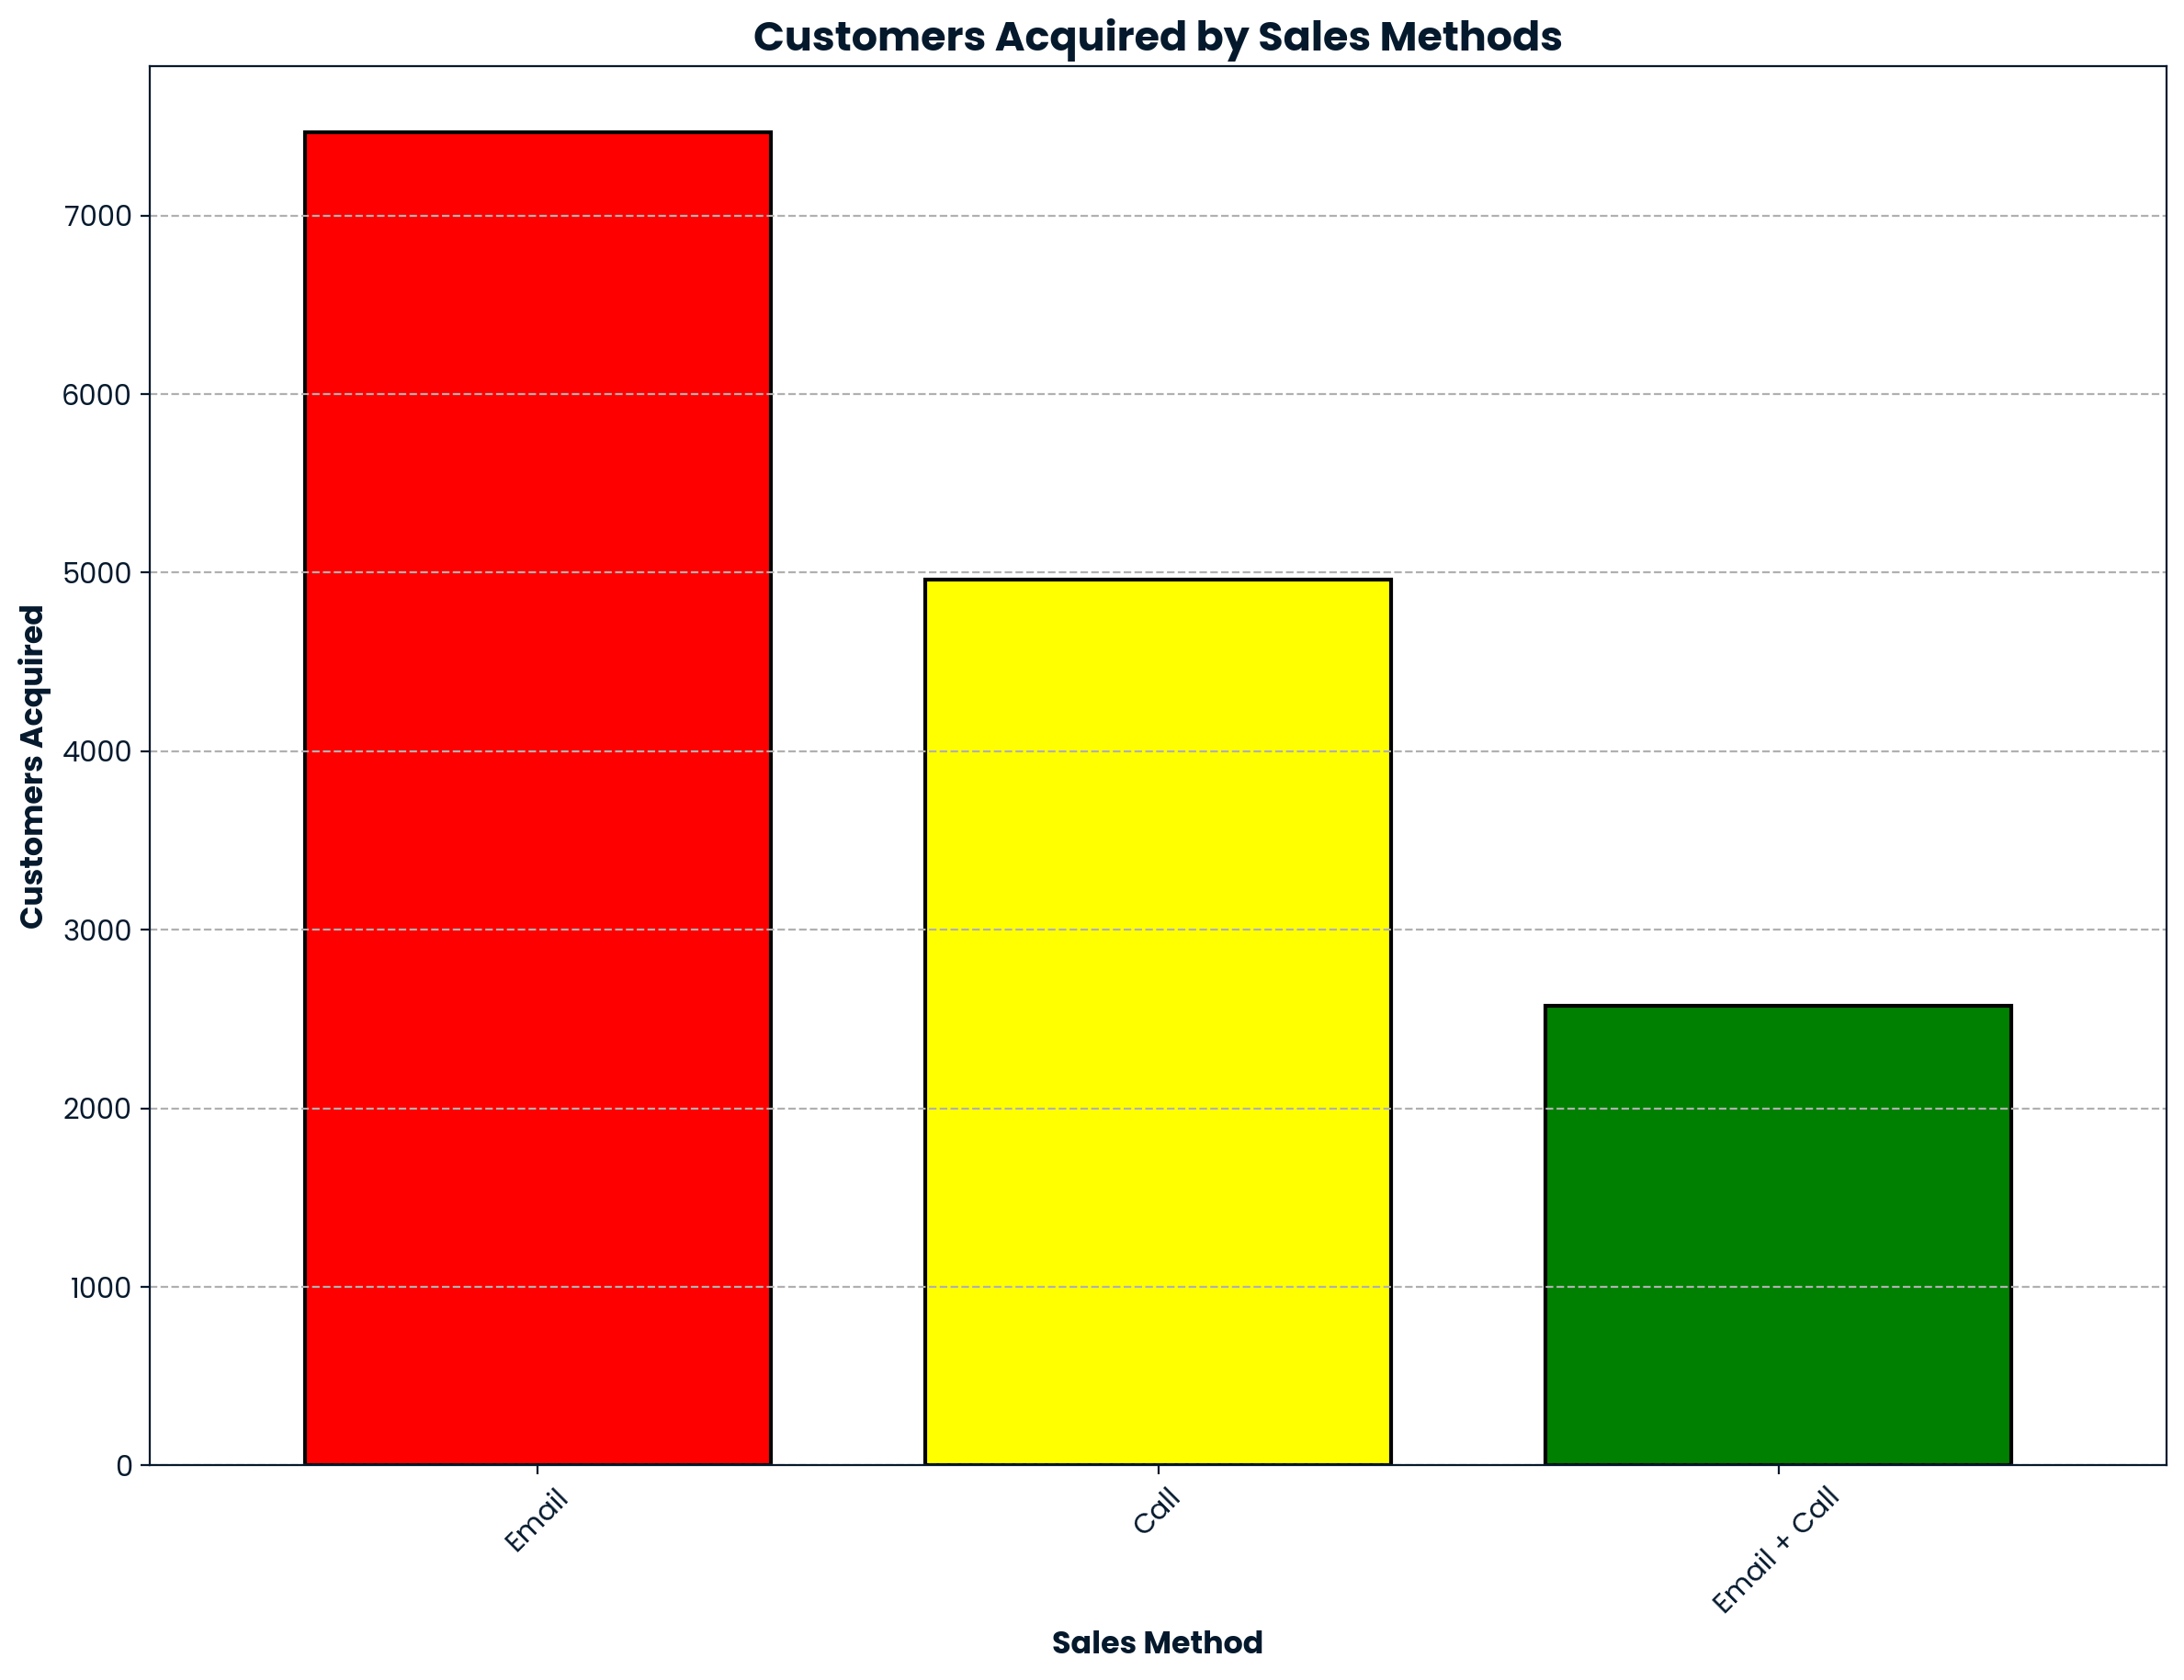

In [25]:
#sales_method column cleaning
print('Initial rows:', len(df['sales_method']))
print('Unique values: ', df['sales_method'].nunique())
print('Value counts before cleaning:\n', df['sales_method'].value_counts())
#Creating function to ensure each sales method is named accordingly
def clean_sales_method(method):
    if method == 'email':
        return 'Email'
    elif method == 'call':
        return 'Call'
    elif method == 'em + call':
        return 'Email + Call'
    return method
#Applying the function on the sales_method column
df['sales_method'] = df['sales_method'].apply(clean_sales_method)
#Validating changes
print('Value counts after cleaning:\n', df['sales_method'].value_counts())
#Plotting the distribution of sales methods
plt.figure(figsize=(12,9))
df['sales_method'].value_counts().plot(kind='bar', color=['red','yellow','green'], edgecolor='black', linewidth=1.5, width=0.75)
plt.xlabel('Sales Method', fontsize=12, fontweight='bold')
plt.ylabel('Customers Acquired', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.title('Customers Acquired by Sales Methods', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--')
plt.show()

In [26]:
#Checking the number of unique, duplicated and null values of the customer_id column
print(f"Number of unique customer id values: {df['customer_id'].nunique()}")
print(f"Number of null customer id values:{df['customer_id'].isna().sum()}")
print(f"Number of duplicated customer id values: {df['customer_id'].duplicated().sum()}")

Number of unique customer id values: 15000
Number of null customer id values:0
Number of duplicated customer id values: 0


Initial rows:  15000
Negative values:  0
Null values:  0


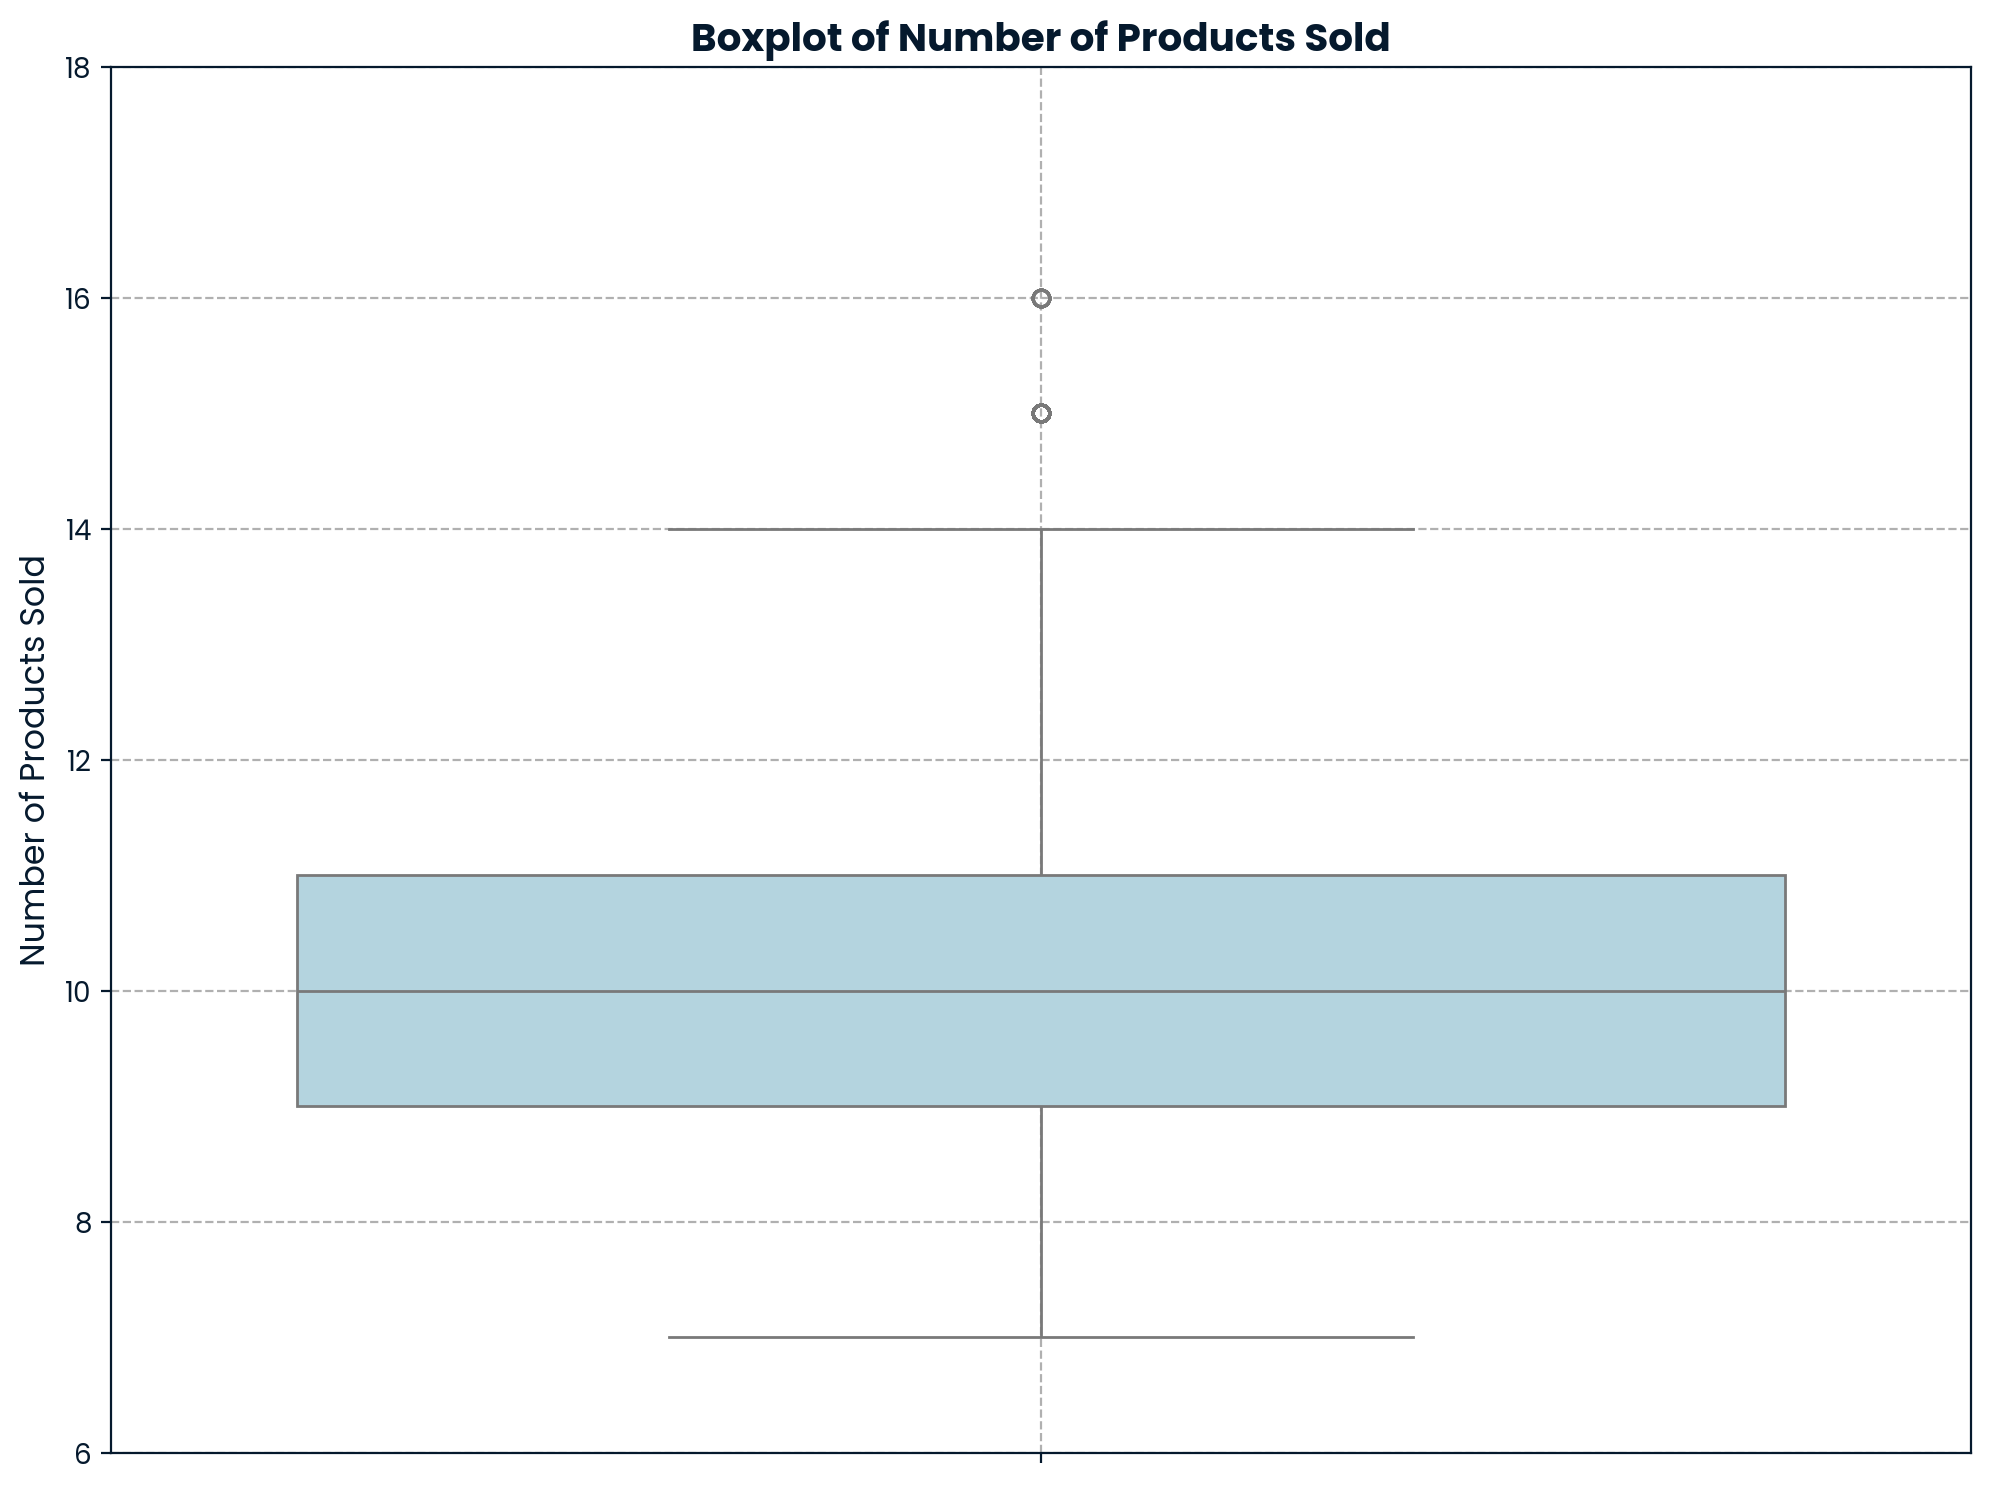

In [27]:
#nb_sold column cleaning
print('Initial rows: ', len(df['nb_sold']))
print('Negative values: ', (df['nb_sold'] <0).sum())
print('Null values: ', df['nb_sold'].isna().sum())
plt.figure(figsize=(12, 9))
sns.boxplot(y=df['nb_sold'], color='lightblue')
plt.title('Boxplot of Number of Products Sold', fontsize=14, fontweight='bold')
plt.ylabel('Number of Products Sold', fontsize=12)
plt.yticks(range(6,20,2))
plt.grid(True, linestyle='--')
plt.show()

0      NaN
1    15.03
2     4.78
3      NaN
4    10.05
5     5.00
6    10.31
7     9.99
8     9.85
9     4.89
Name: unit_price, dtype: float64
5.18     123
5.14     116
5.10     110
4.84     109
5.00     108
        ... 
15.73      1
15.68      1
14.17      1
15.81      1
15.84      1
Name: unit_price, Length: 358, dtype: int64
Negative values: 0
Null values: 1074
sales_method
Call             5.02
Email            9.98
Email + Call    15.10
Name: unit_price, dtype: float64
state
Alabama            9.865
Alaska             9.760
Arizona            9.720
Arkansas           9.635
California         9.780
Colorado           9.715
Connecticut        9.800
Delaware           9.870
Florida            9.790
Georgia            9.765
Hawaii             9.840
Idaho             10.040
Illinois           9.800
Indiana            9.720
Iowa               9.740
Kansas             9.820
Kentucky           9.880
Louisiana          9.820
Maine              9.645
Maryland           9.790
Massachusetts  

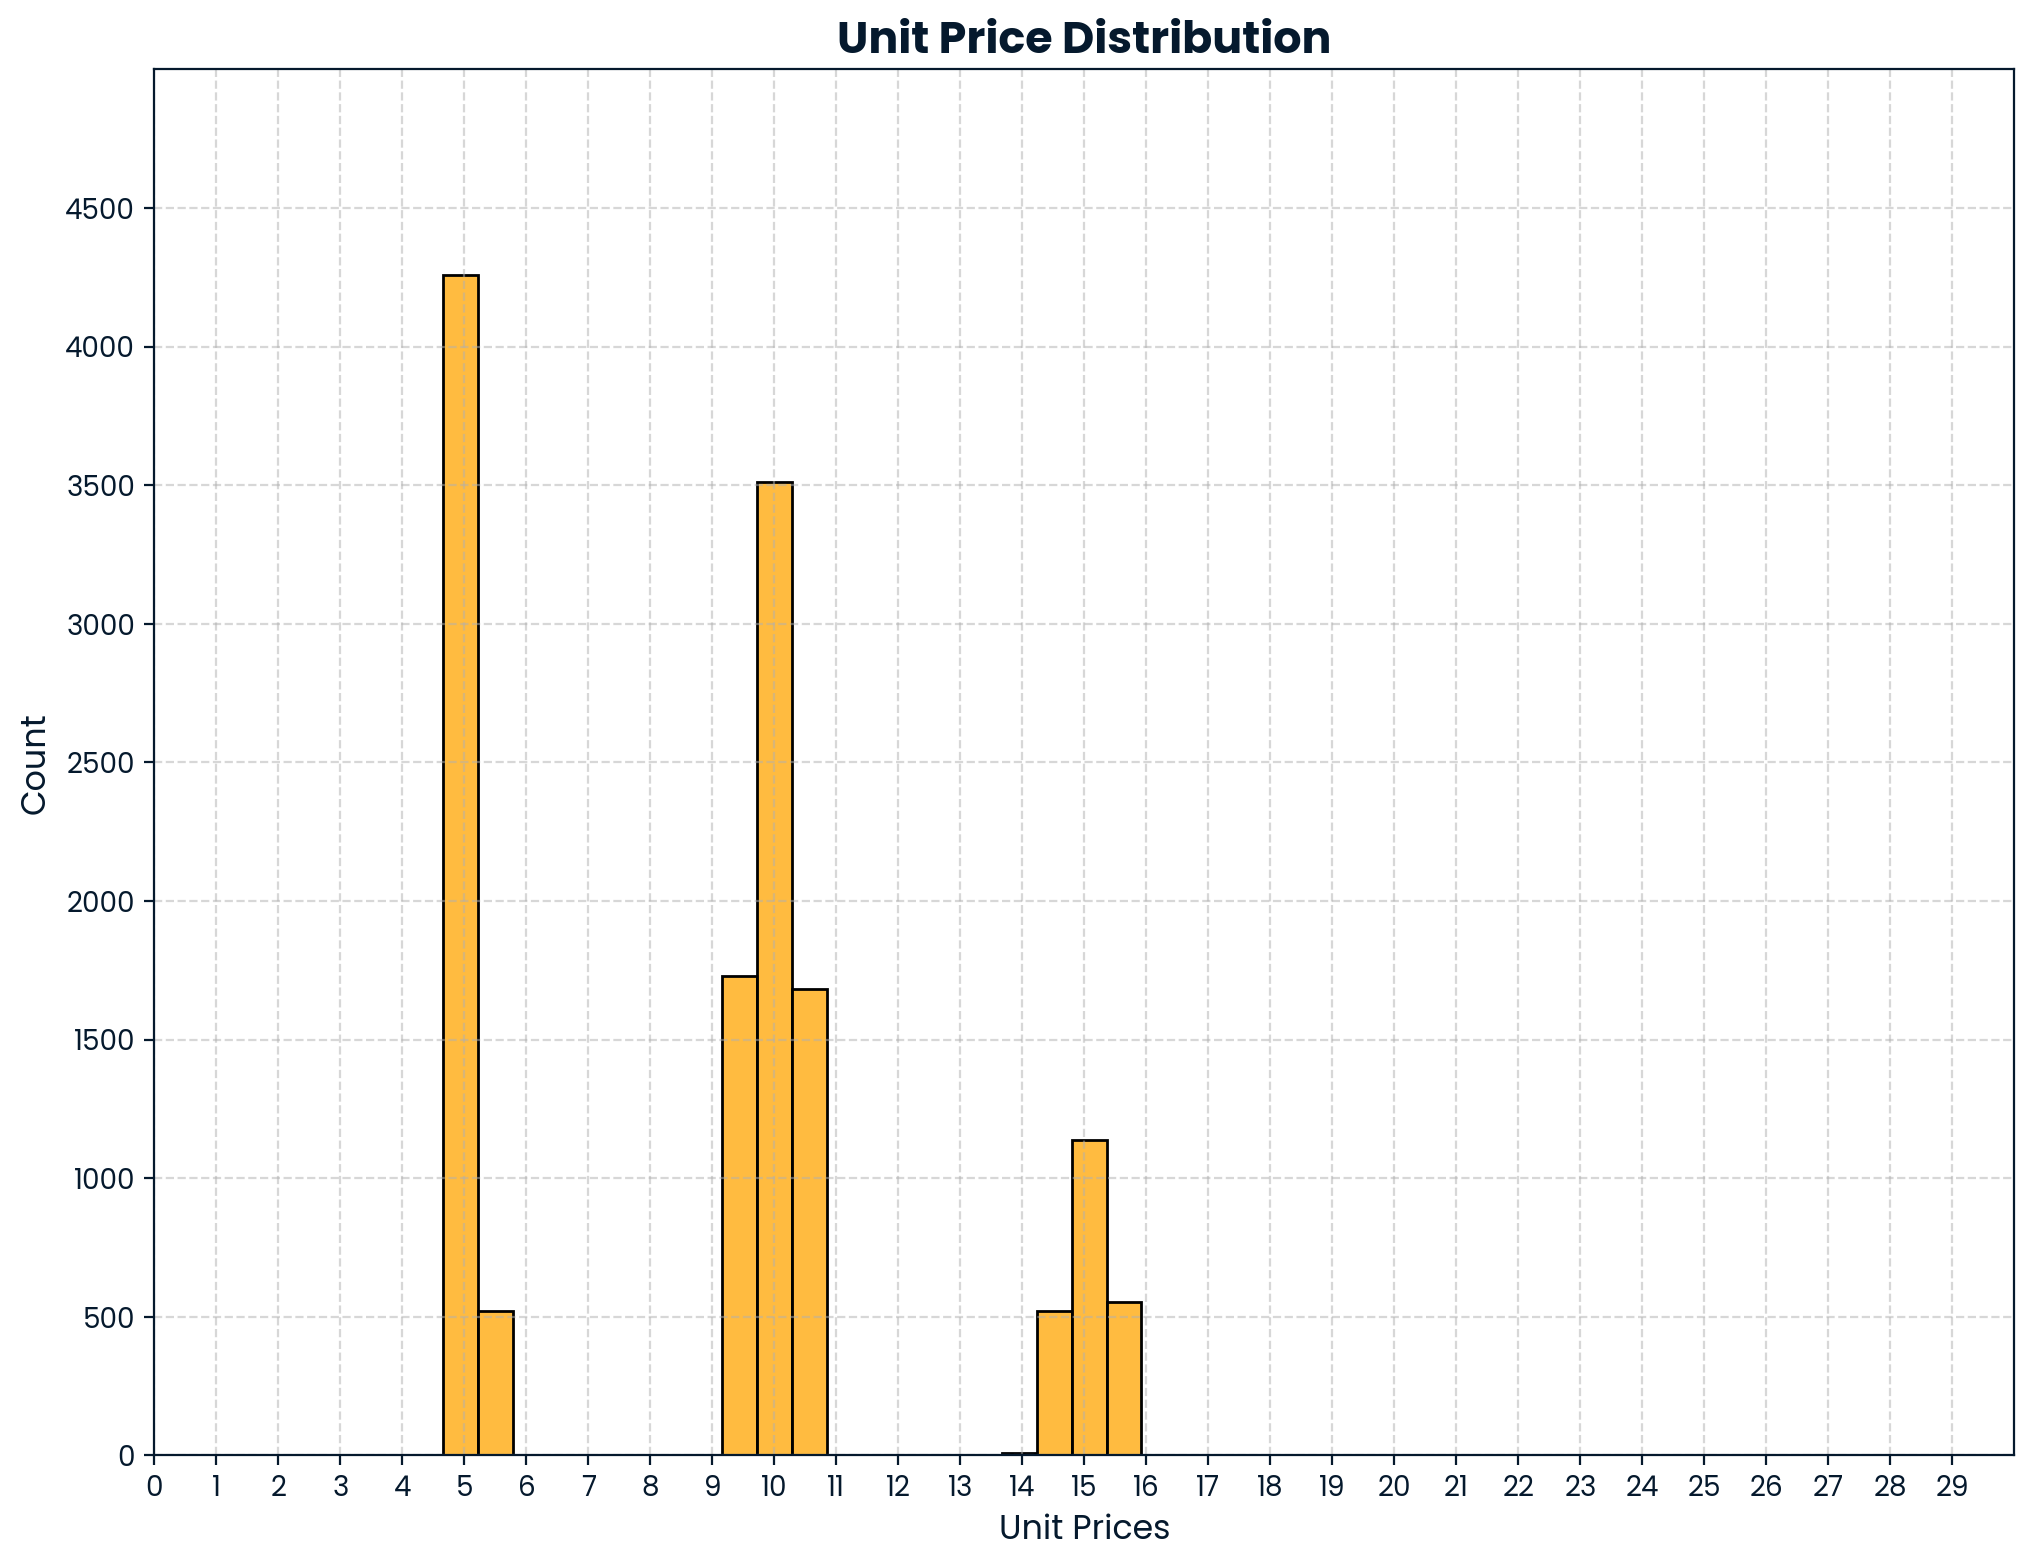

In [28]:
#calculating unit_price
df['unit_price'] = df['revenue'] / df['nb_sold']
df['unit_price'] = round(df['unit_price'],2)
print(df['unit_price'].head(10))
#Validating unit_price values
print(df['unit_price'].value_counts())
print("Negative values:", (df['unit_price'] < 0).sum())
print('Null values:', df['unit_price'].isna().sum())
#checking if sales_method determines unit price
print(df.groupby('sales_method')['unit_price'].median())
#checking if state determines unit price
print(df.groupby('state')['unit_price'].median())
#Unit prices are determined by sales method because prices differ based on sales_method
#Visualizing the unit_price column
plt.figure(figsize=(12,9))
sns.histplot(data=df, x='unit_price', color='orange', bins=20)
plt.xlabel('Unit Prices', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Unit Price Distribution', fontsize=16, fontweight='bold')
plt.grid(True, linestyle = '--', alpha=0.5)
plt.xticks(range(0, 30, 1))
plt.yticks(range(0, 5000, 500))
plt.xlim(0,30)
plt.ylim(0,5000)
plt.show()


Negative values: 0
Null values: 1074
    week  sales_method  ...         state  unit_price
0      2         Email  ...       Arizona         NaN
3      4         Email  ...       Indiana         NaN
16     2         Email  ...  Pennsylvania         NaN
17     6  Email + Call  ...     Wisconsin         NaN
28     5         Email  ...       Florida         NaN

[5 rows x 9 columns]
sales_method
Call             5.02
Email            9.98
Email + Call    15.10
Name: unit_price, dtype: float64
Null values: 0


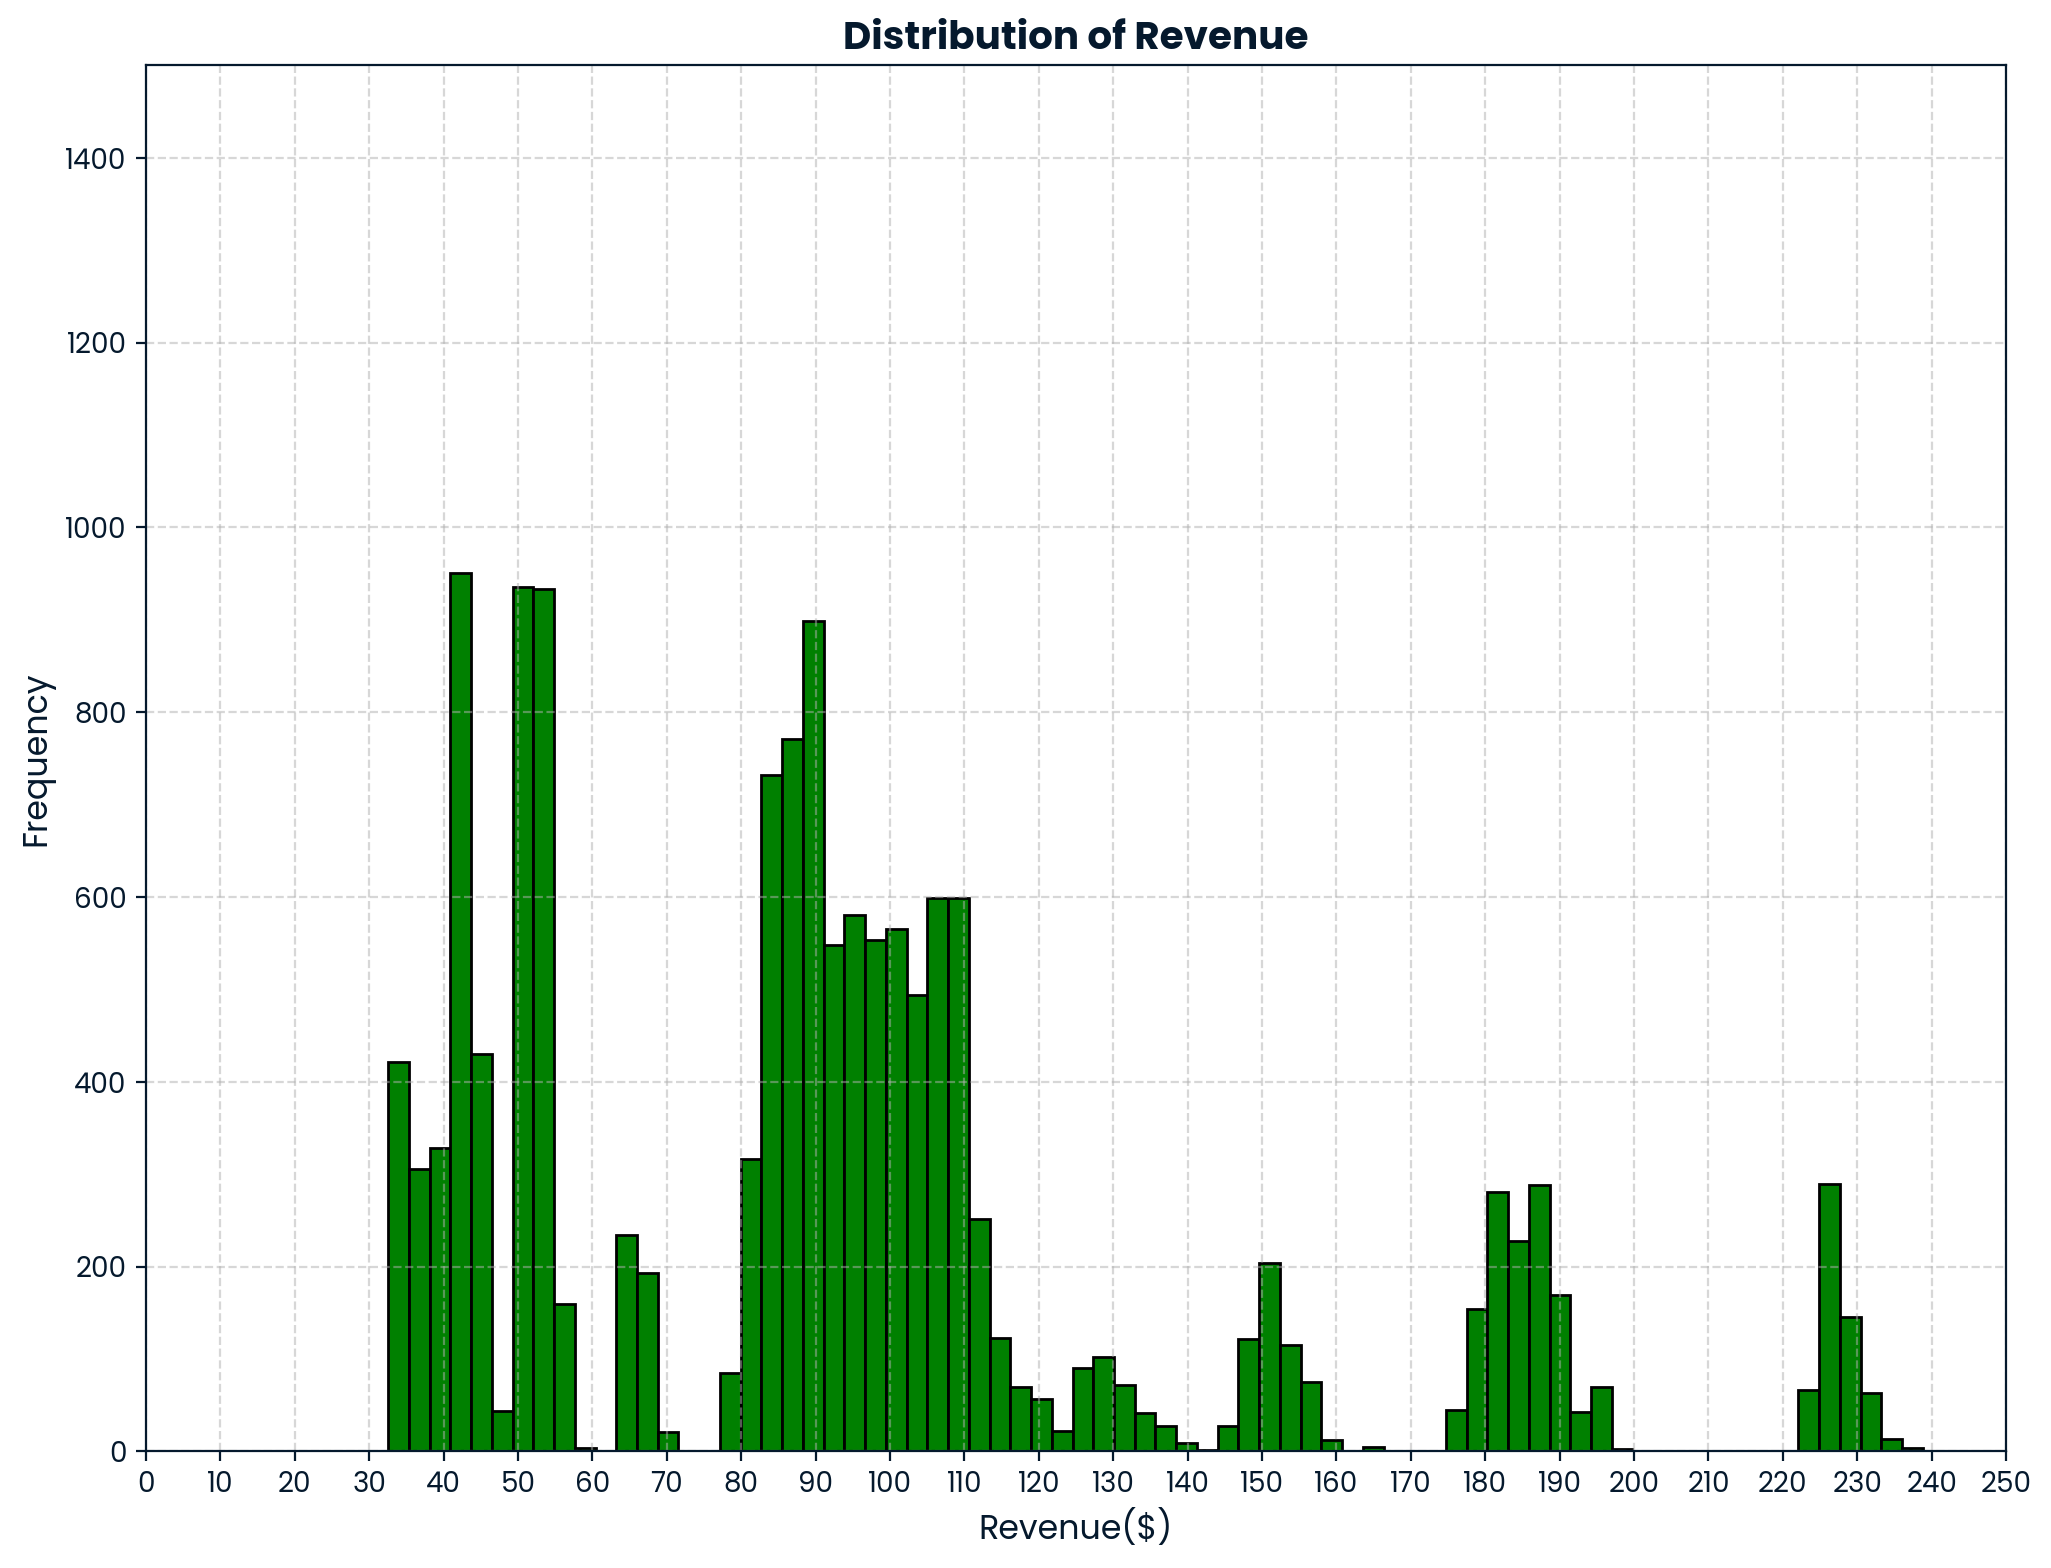

In [29]:
#revenue column cleaning
print("Negative values:", (df['revenue'] < 0).sum())
print('Null values:', df['revenue'].isna().sum())
#Exploring null revenue data to identfy patterns
null_revenue = df[df['revenue'].isna()]
print(null_revenue.head())
#Selecting the median unit_price of each sales_method
sm_median = df.groupby('sales_method')['unit_price'].median()
print(sm_median)
df['revenue'] = df.apply(
    lambda x: sm_median[x['sales_method']] * x['nb_sold']
    if (pd.isna(x['revenue']) and x['nb_sold']> 0)
    else x['revenue'],
    axis=1
)
#Verifying changes
print('Null values:', df['revenue'].isna().sum())
plt.figure(figsize=(12,9))
plt.hist(df['revenue'], bins=75, color='green', edgecolor='black')
plt.title('Distribution of Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Revenue($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle = '--', alpha=0.5)
plt.xticks(range(0, 251, 10))
plt.xlim(0,250)
plt.ylim(0,1500)
plt.show()

Initial Rows: 15000
Negative values: 0
Null values: 0
Number of rows after cleaning:  15000


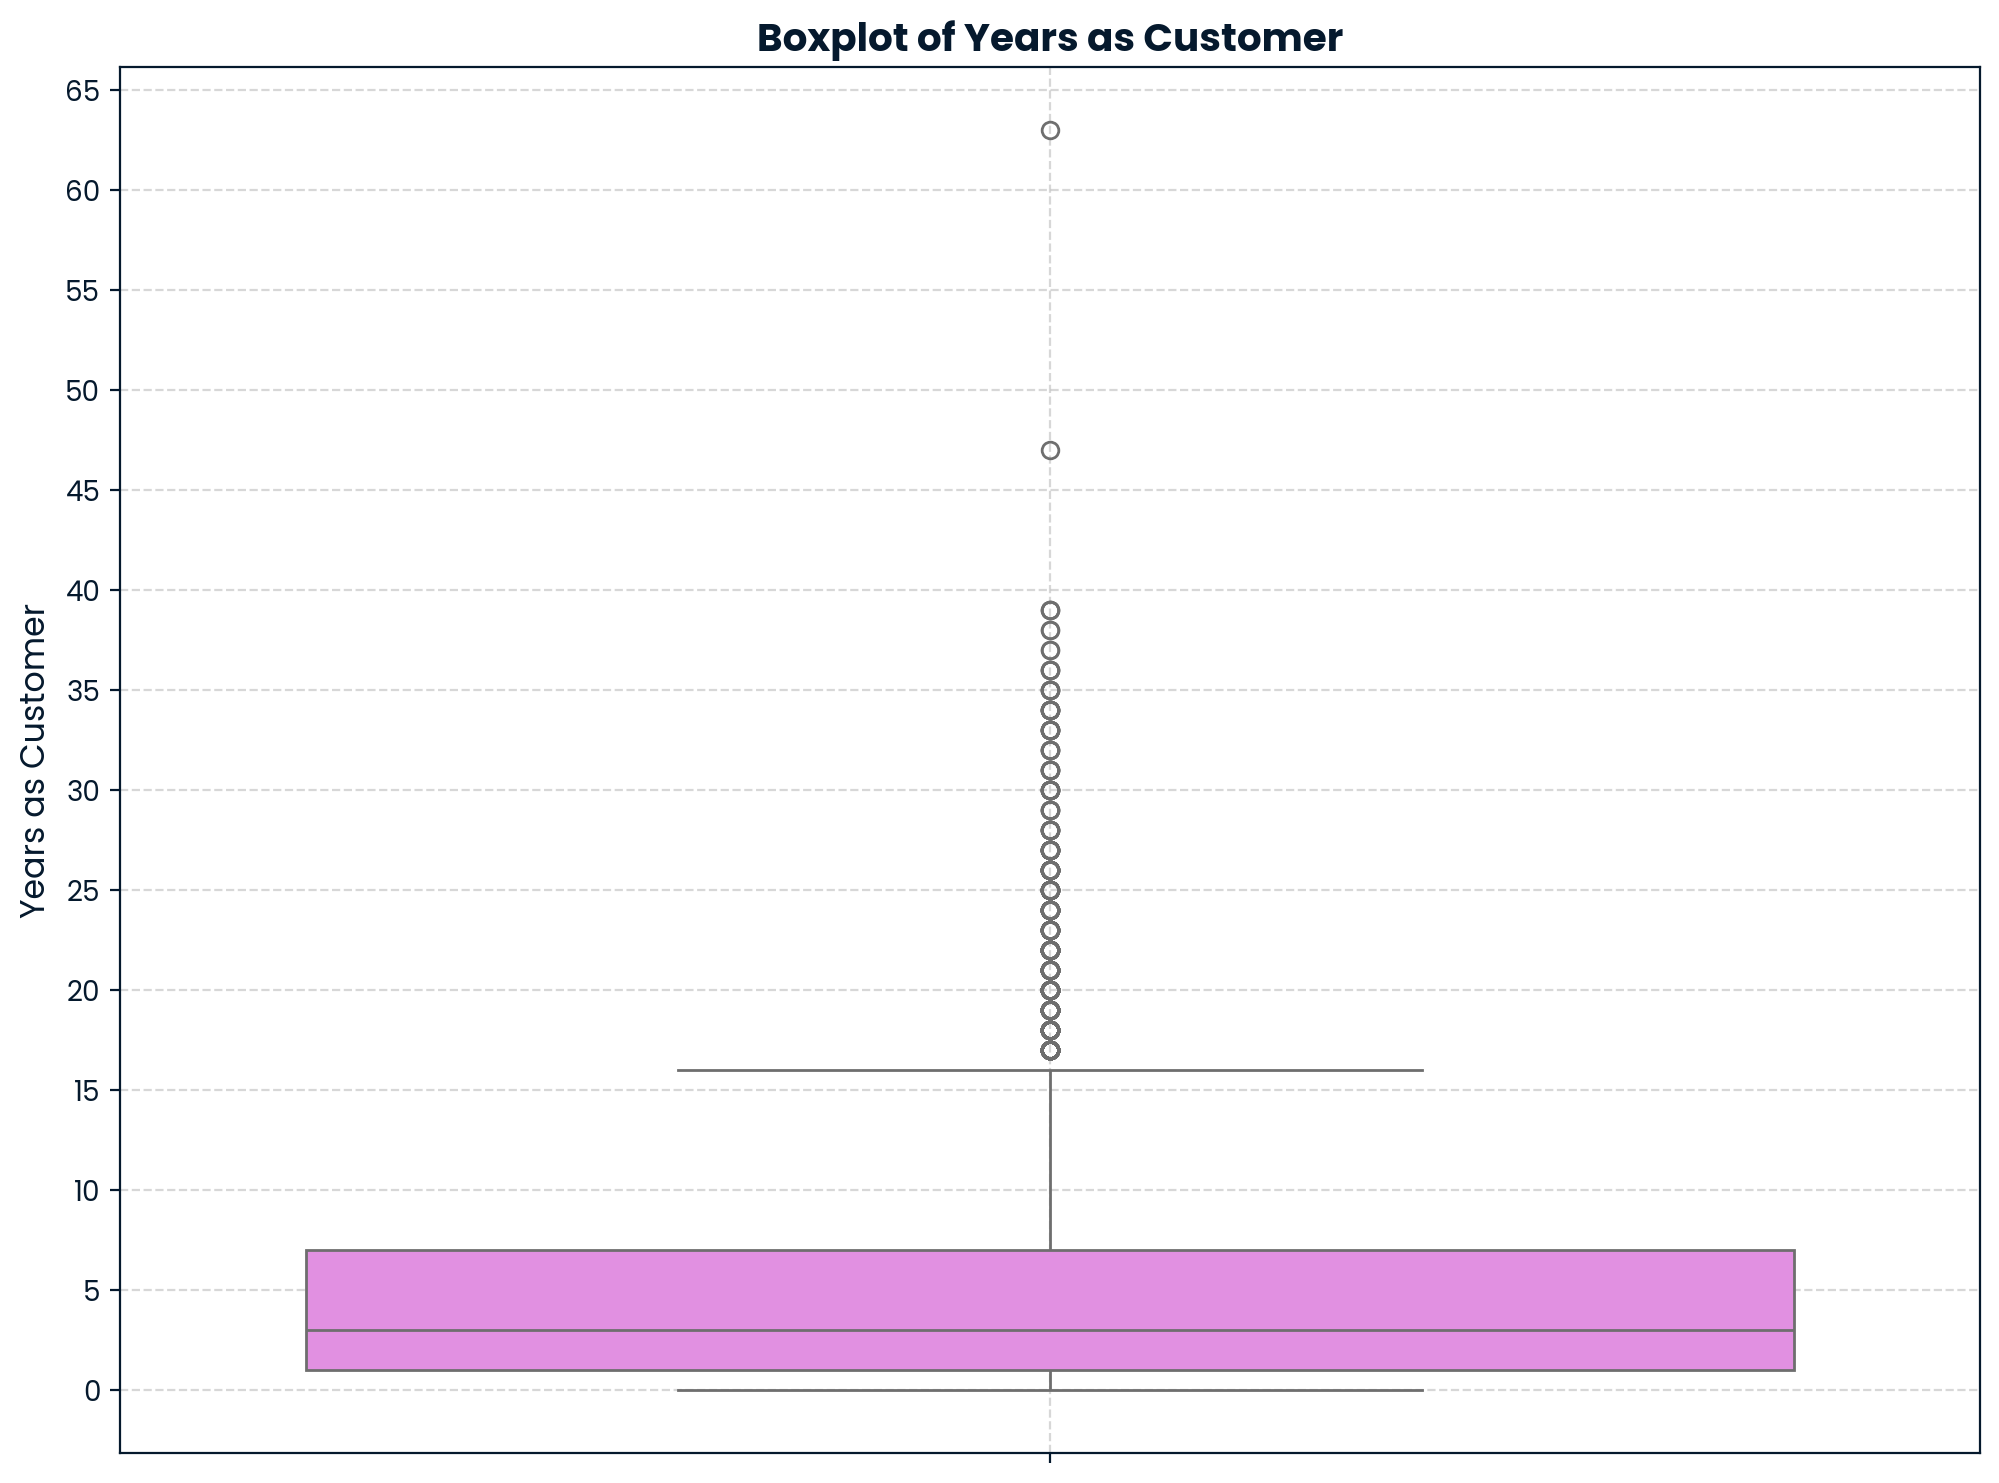

In [30]:
#years_as_customer cleaning
print('Initial Rows:', len(df['years_as_customer']))
print("Negative values:", (df['years_as_customer'] < 0).sum())
print('Null values:', df['years_as_customer'].isna().sum())
print('Number of rows after cleaning: ', len(df['years_as_customer']))
plt.figure(figsize=(12, 9))
sns.boxplot(y=df['years_as_customer'], color='violet')
plt.title('Boxplot of Years as Customer', fontsize=14, fontweight='bold')
plt.ylabel('Years as Customer', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.yticks(range(0,70,5))
plt.show()

Initial Rows: 15000
Negative values: 0
Null values: 0
Number of rows after cleaning:  15000


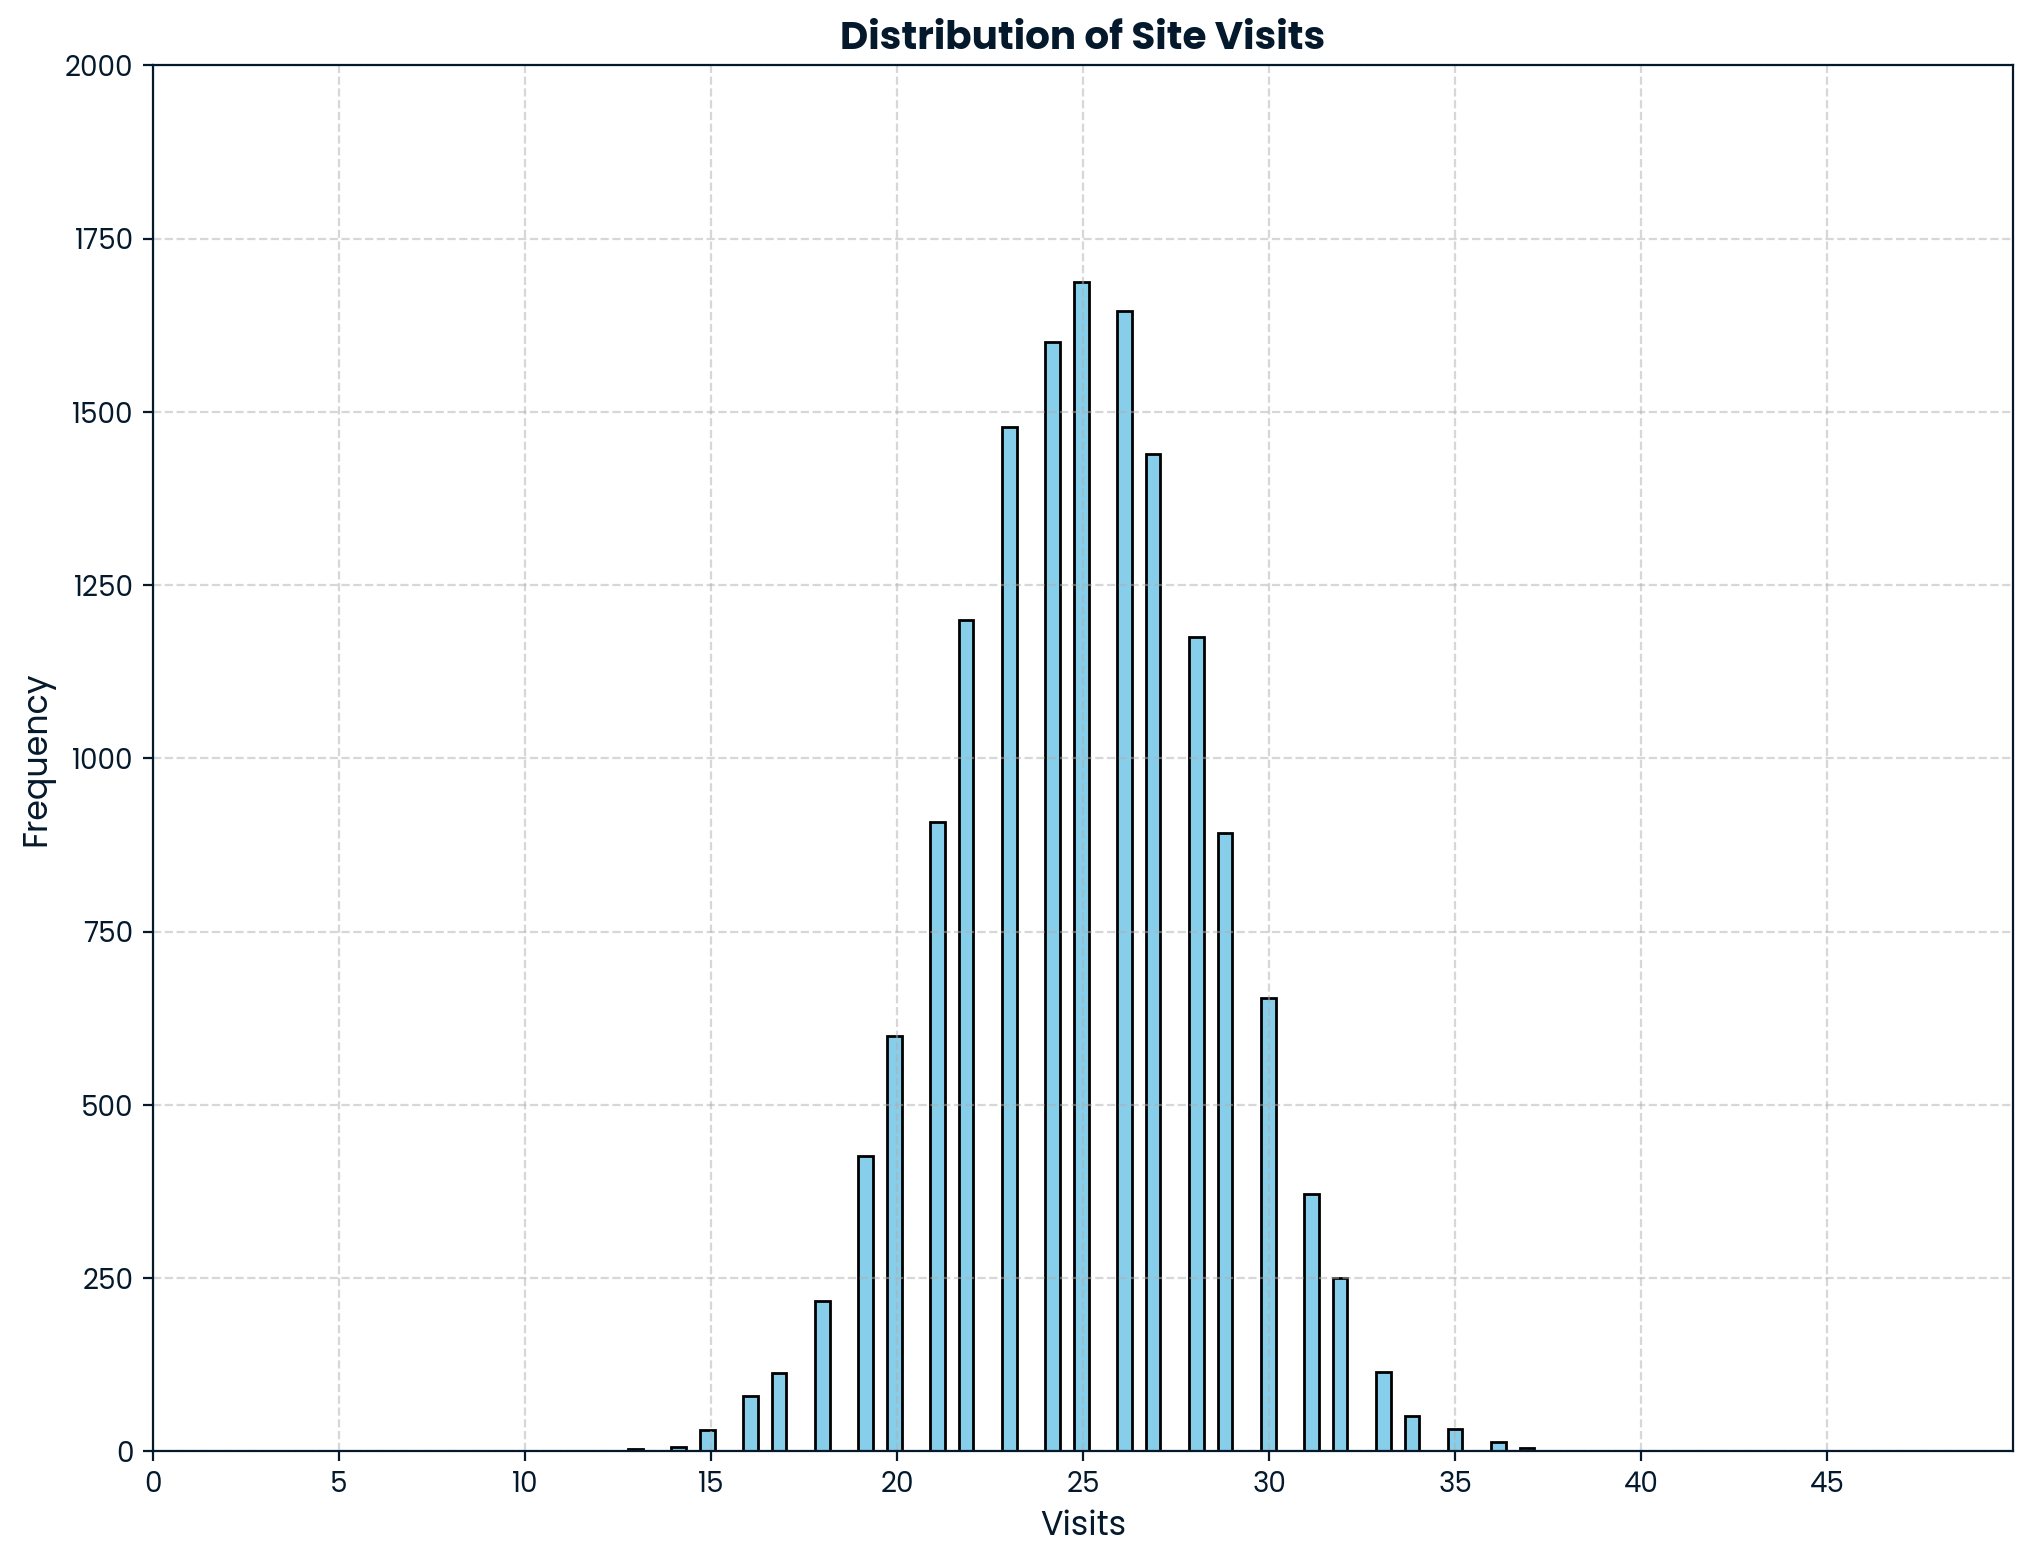

In [31]:
#nb_site_visits cleaning 
print('Initial Rows:', len(df['nb_site_visits']))
print("Negative values:", (df['nb_site_visits'] < 0).sum())
print('Null values:', df['nb_site_visits'].isna().sum())
print('Number of rows after cleaning: ', len(df['nb_site_visits']))
plt.figure(figsize=(12,9))
plt.hist(df['nb_site_visits'], bins=75, color='skyblue', edgecolor='black')
plt.title('Distribution of Site Visits', fontsize=14, fontweight='bold')
plt.xlabel('Visits', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle = '--', alpha=0.5)
plt.xticks(range(0, 50, 5))
plt.xlim(0,50)
plt.ylim(0,2000)
plt.show()

Initial Rows: 15000
Unique values: 50
Null values: 0
Invalid states: []


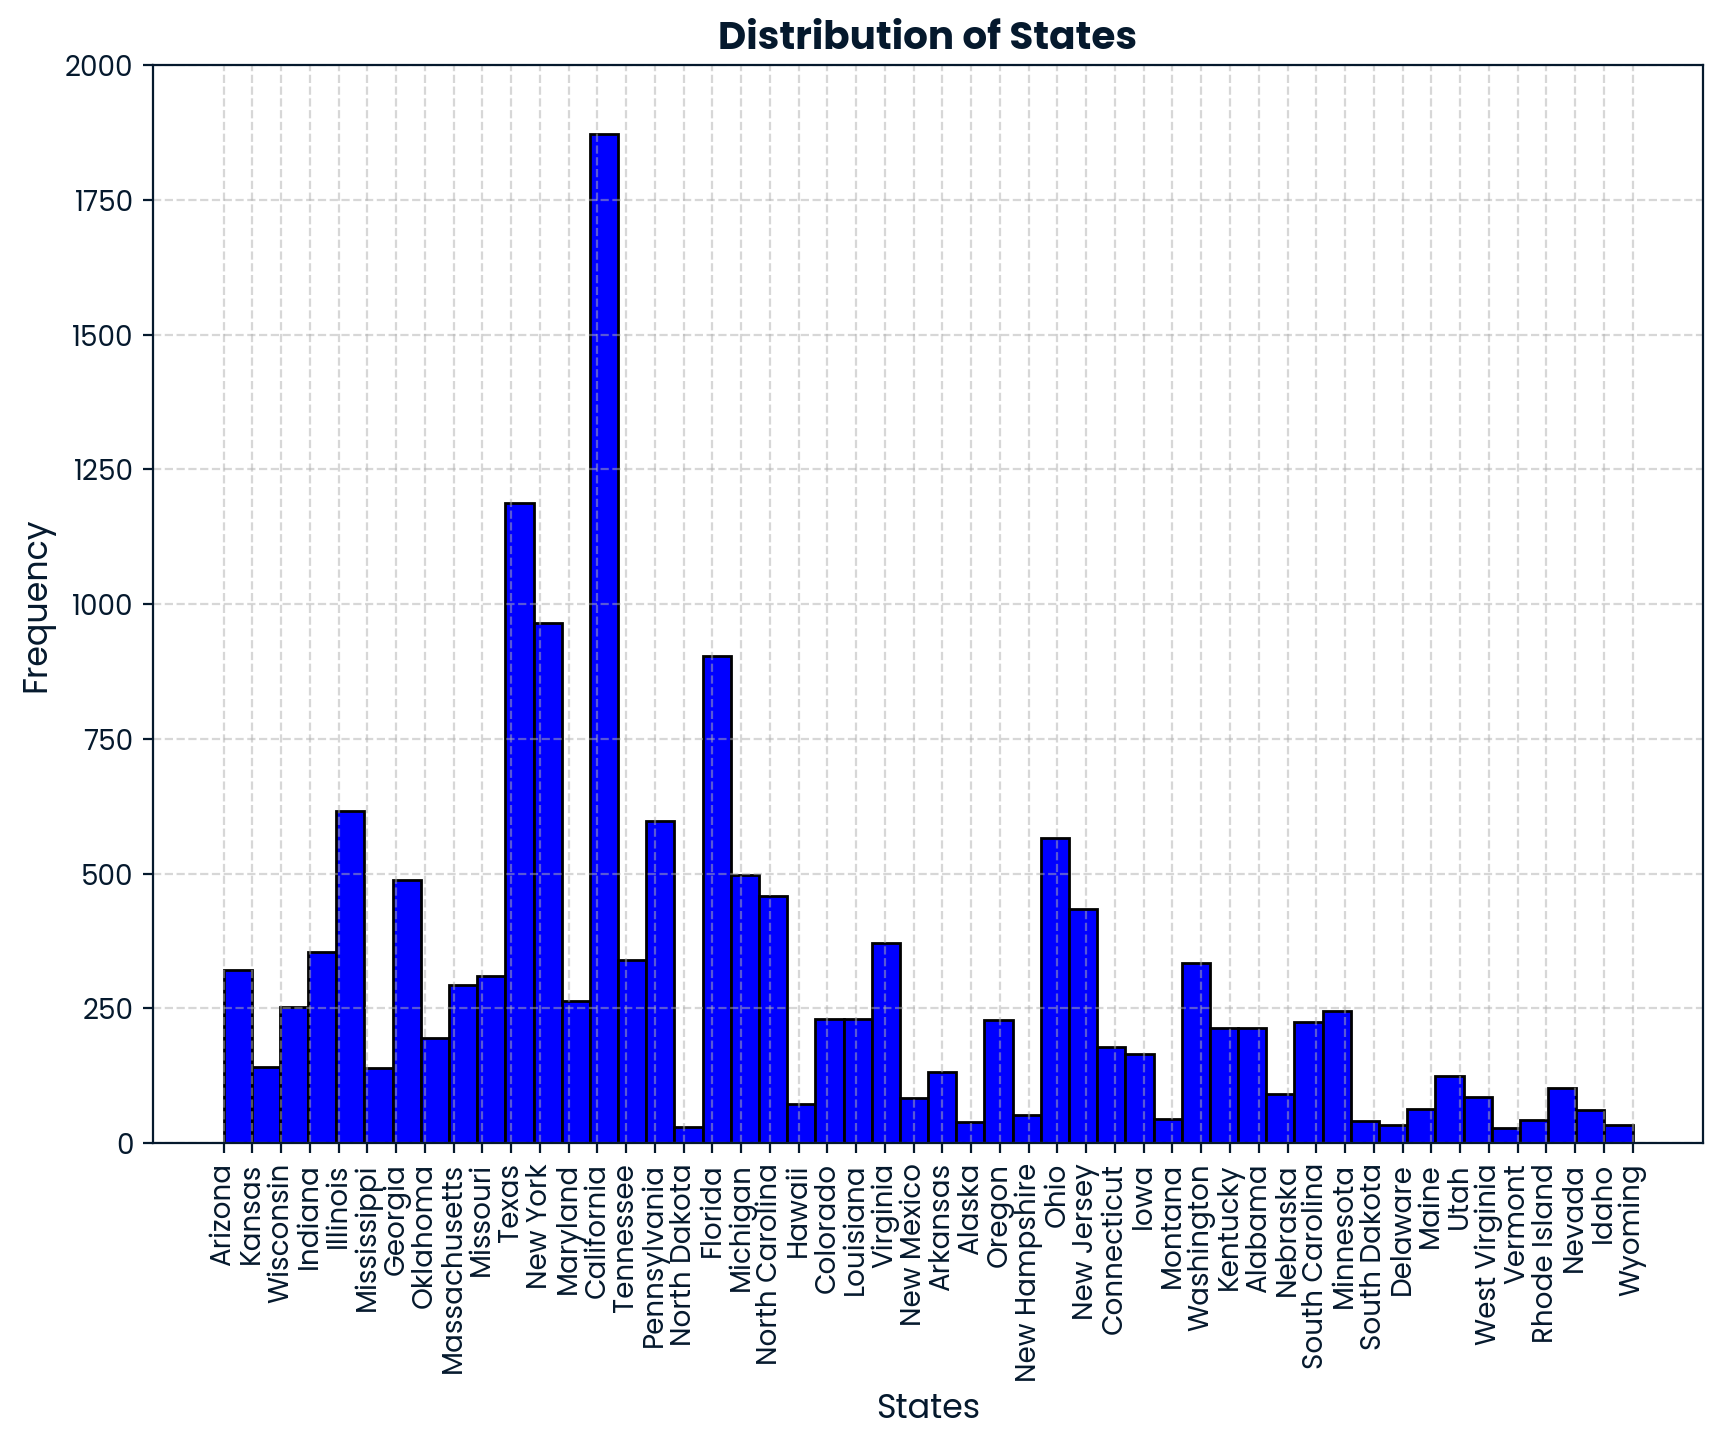

In [32]:
#states cleaning
print('Initial Rows:', len(df['state']))
print('Unique values:', df['state'].nunique())
print('Null values:', df['state'].isna().sum())
#Ensured all values were valid US States and were spelt correctly
valid_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", 
    "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", 
    "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", 
    "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", 
    "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
    "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", 
    "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", 
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]
#Standardize casing
df['state'] = df['state'].str.strip().str.title()
invalid_states = df[~df['state'].isin(valid_states)]['state'].unique()
print('Invalid states:', invalid_states)
plt.figure(figsize=(10,7))
plt.hist(df['state'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of States', fontsize=14, fontweight='bold')
plt.xlabel('States', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle = '--', alpha=0.5)
plt.xticks(rotation=90)
plt.ylim(0,2000)
plt.show()

In [33]:
#Final validation after cleaning
print('Null values:\n',df.isnull().sum())
print('Number of duplicated rows:',df.duplicated().sum())
print('Data types:\n',df.dtypes)
print(df.head())
print("Final row count:", len(df))

Null values:
 week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue                 0
years_as_customer       0
nb_site_visits          0
state                   0
unit_price           1074
dtype: int64
Number of duplicated rows: 0
Data types:
 week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
unit_price           float64
dtype: object
   week  sales_method  ...      state  unit_price
0     2         Email  ...    Arizona         NaN
1     6  Email + Call  ...     Kansas       15.03
2     5          Call  ...  Wisconsin        4.78
3     4         Email  ...    Indiana         NaN
4     3         Email  ...   Illinois       10.05

[5 rows x 9 columns]
Final row count: 15000


                revenue
sales_method           
Call          236413.75
Email         725571.11
Email + Call  473986.99


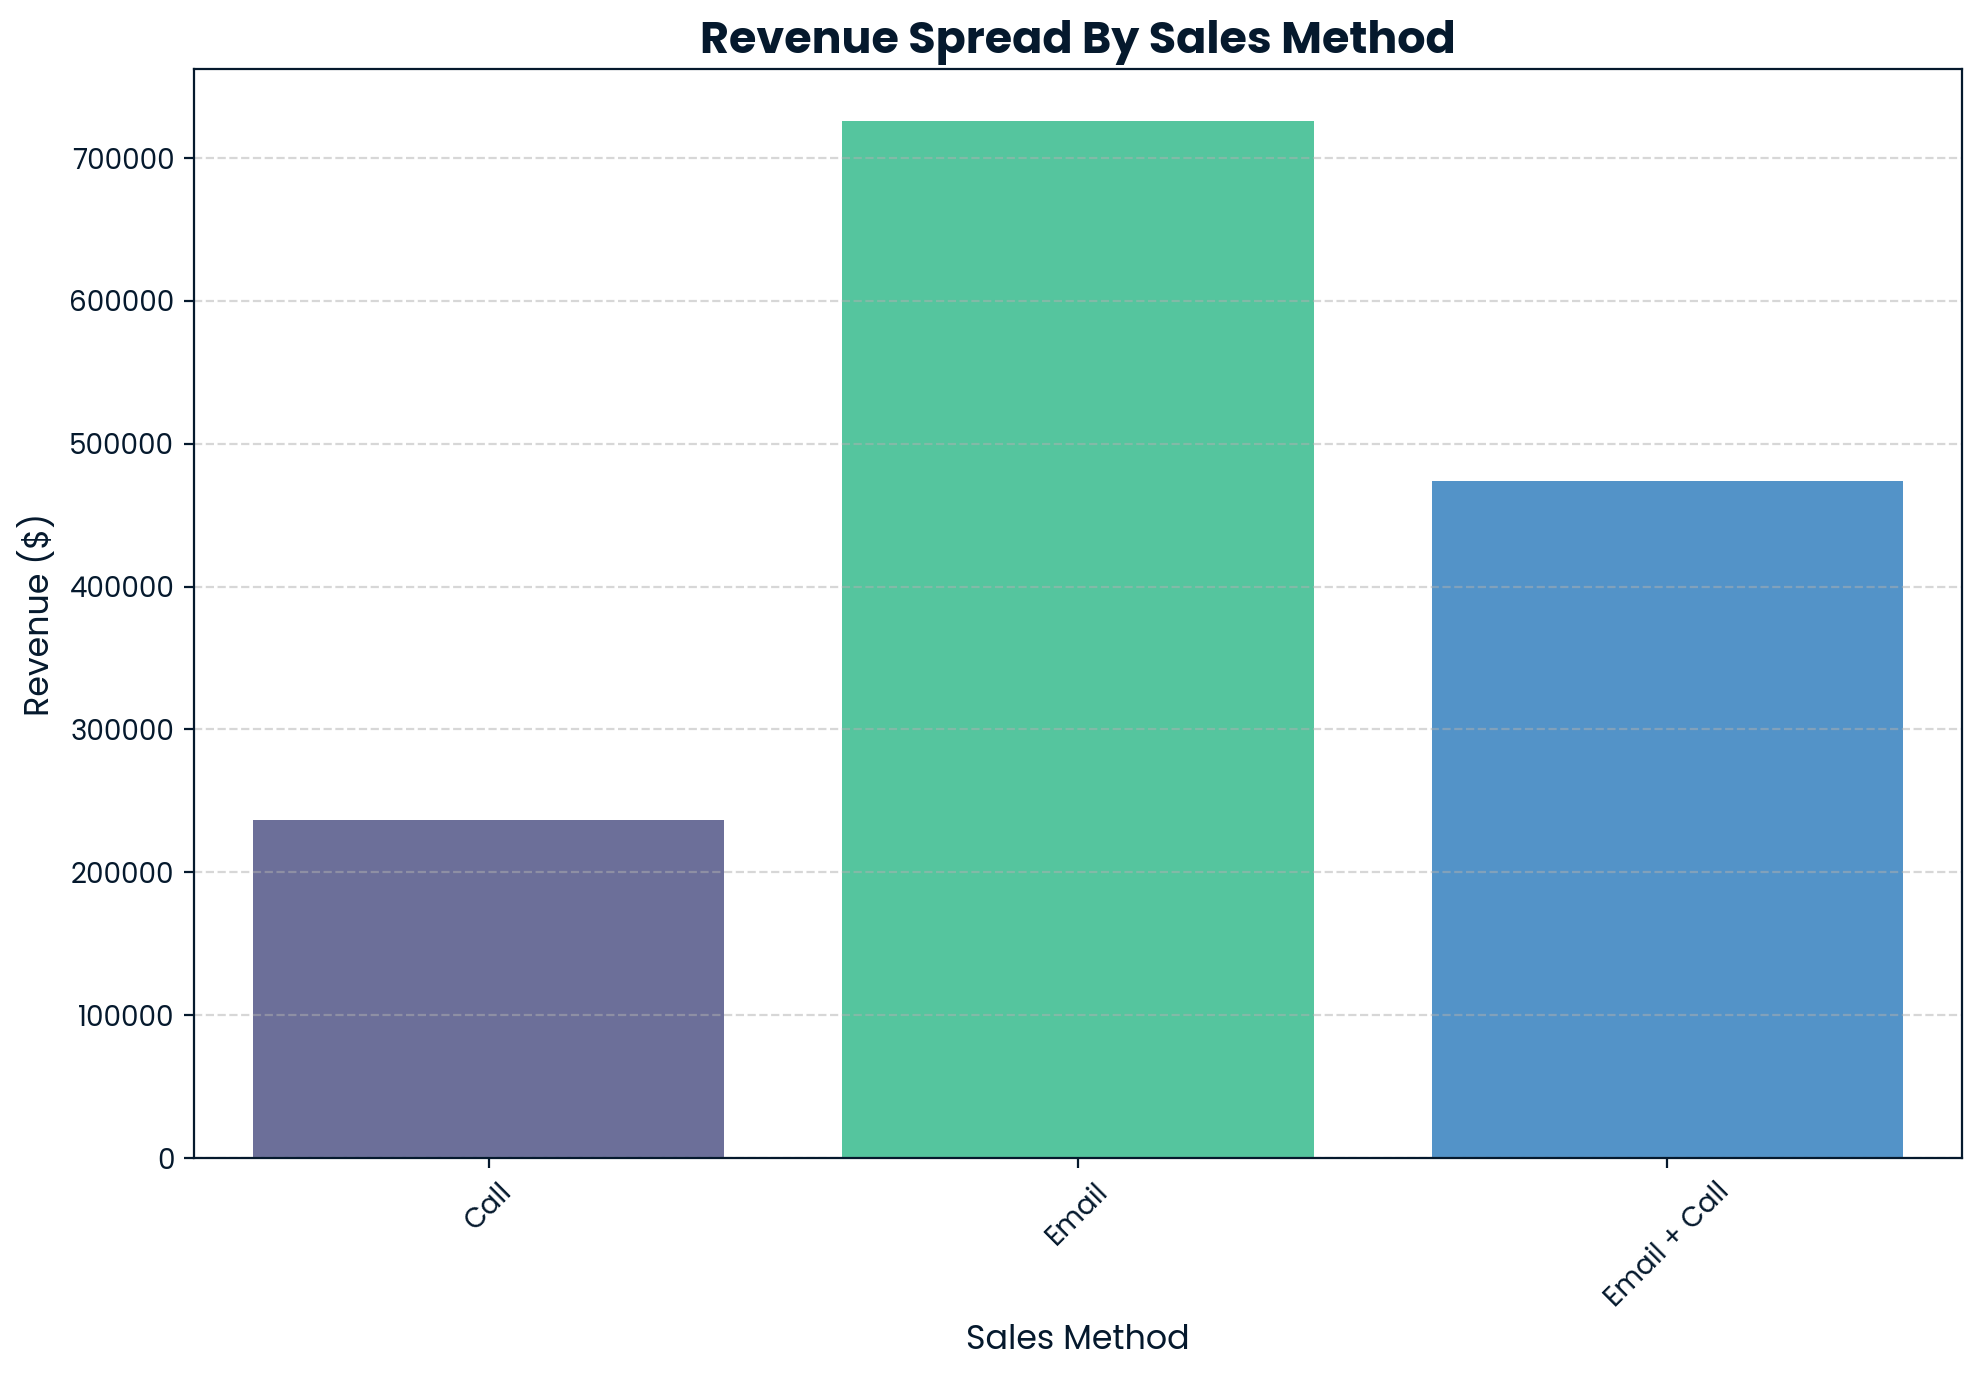

In [34]:
revenue_spread = df.groupby('sales_method').agg({'revenue':'sum'})
print(revenue_spread)
plt.figure(figsize=(10,7))
sns.barplot(data=revenue_spread, x='sales_method', y='revenue', hue='sales_method')
plt.xlabel('Sales Method', fontsize = 12)
plt.ylabel('Revenue ($)', fontsize = 12)
plt.xticks(rotation = 45)
plt.title('Revenue Spread By Sales Method', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

    week sales_method  ...        state  unit_price
2      5         Call  ...    Wisconsin        4.78
5      6         Call  ...  Mississippi        5.00
9      5         Call  ...     Missouri        4.89
11     2         Call  ...     New York        5.05
12     5         Call  ...     Maryland        4.86

[5 rows x 9 columns]
       revenue
week          
1     26796.72
2     35122.32
3     37647.85
4     51692.35
5     55516.07
6     29638.44


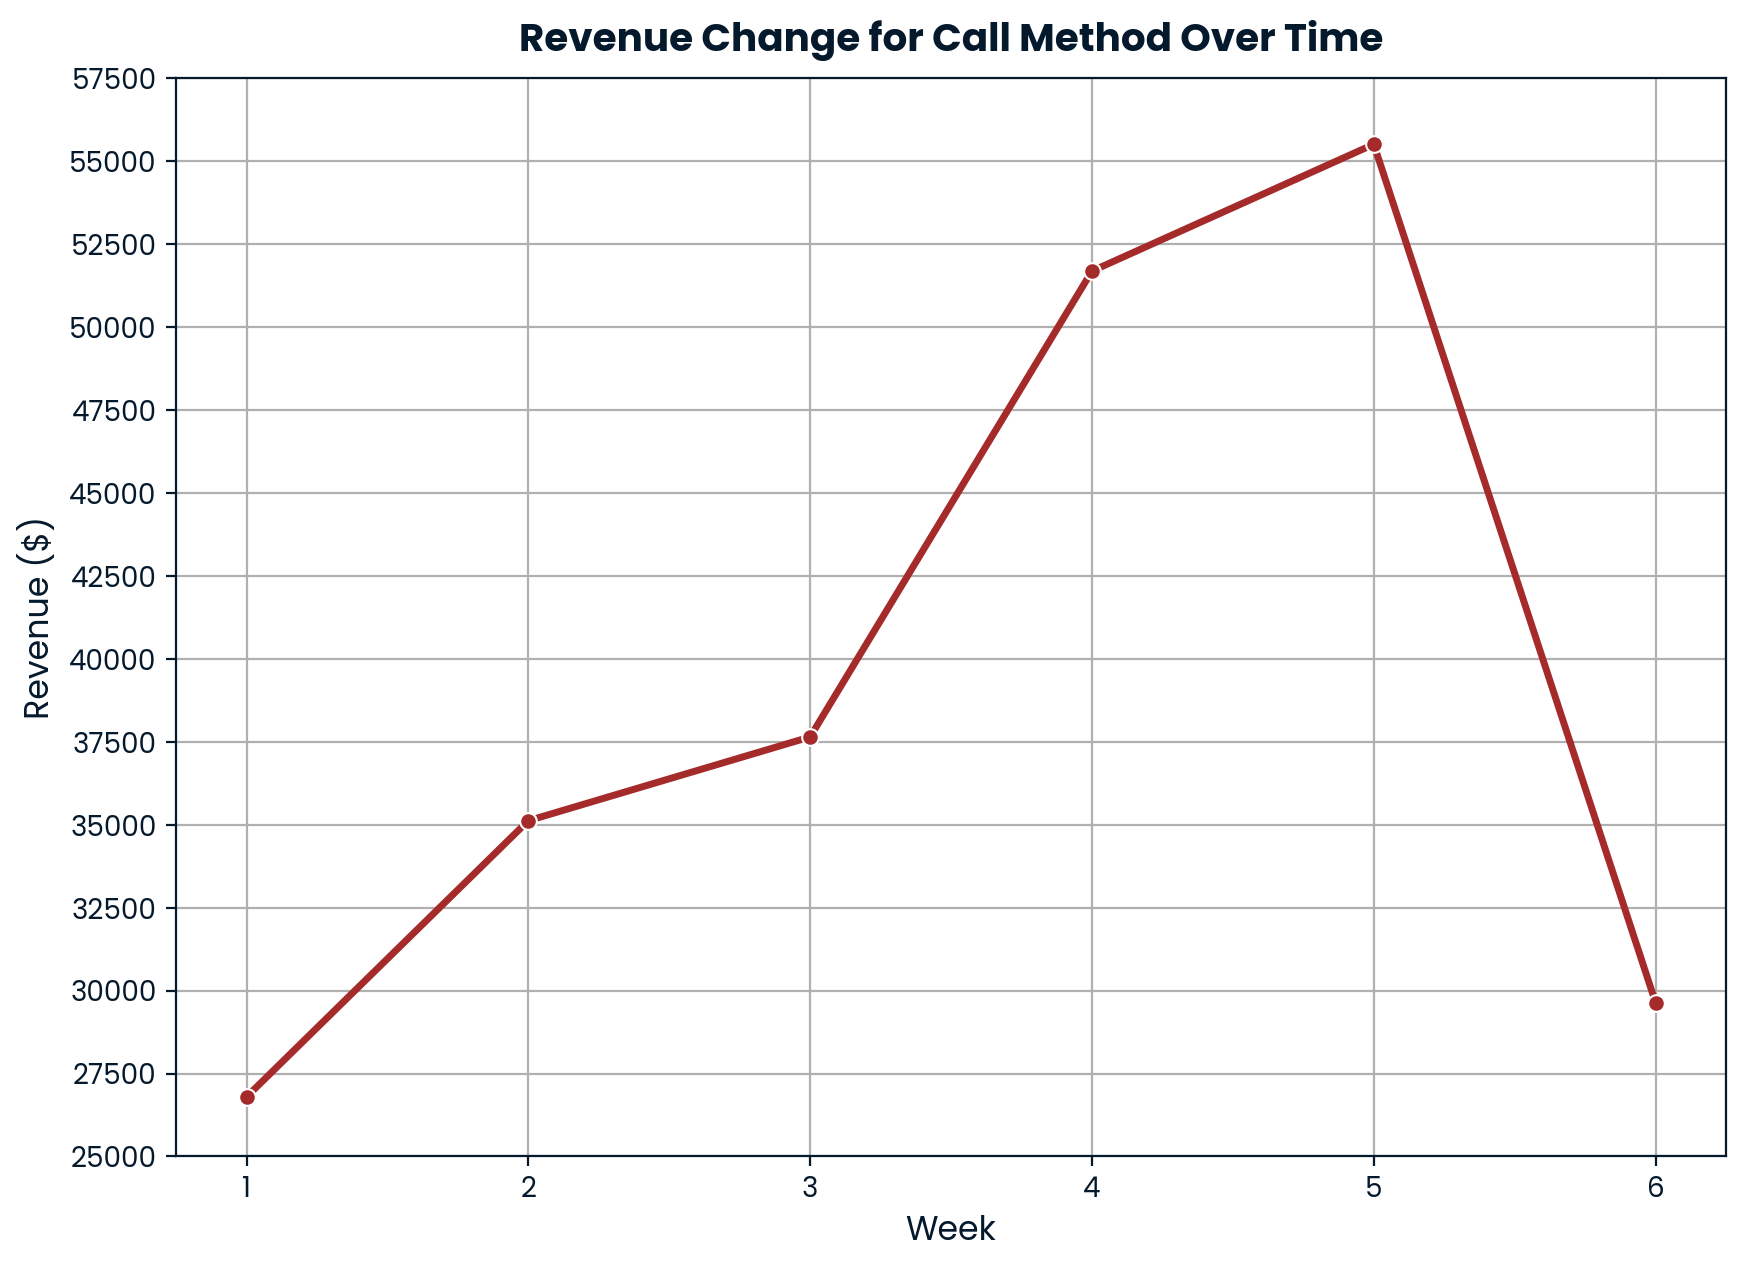

In [35]:
#Classified the data to only show Call sales method
call_df = df[df['sales_method'] == 'Call']
print(call_df.head())
#Grouped the call dataframe by week to show the weekly revenue change
call_revenue = call_df.groupby('week').agg({'revenue':'sum'})
print(call_revenue)
# Create the line plot
plt.figure(figsize=(10, 7))  # Set figure size
sns.lineplot(data=call_revenue, x='week', y='revenue', marker='o', color='brown', linewidth=2.5)
plt.title('Revenue Change for Call Method Over Time', fontsize=14, pad=10, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.yticks(range(25000,60000,2500))
plt.grid(True)

   week sales_method  ...     state  unit_price
0     2        Email  ...   Arizona         NaN
3     4        Email  ...   Indiana         NaN
4     3        Email  ...  Illinois       10.05
6     4        Email  ...   Georgia       10.31
7     1        Email  ...  Oklahoma        9.99

[5 rows x 9 columns]
        revenue
week           
1     246202.61
2     148819.67
3     106826.04
4     117029.85
5      80900.37
6      25792.57


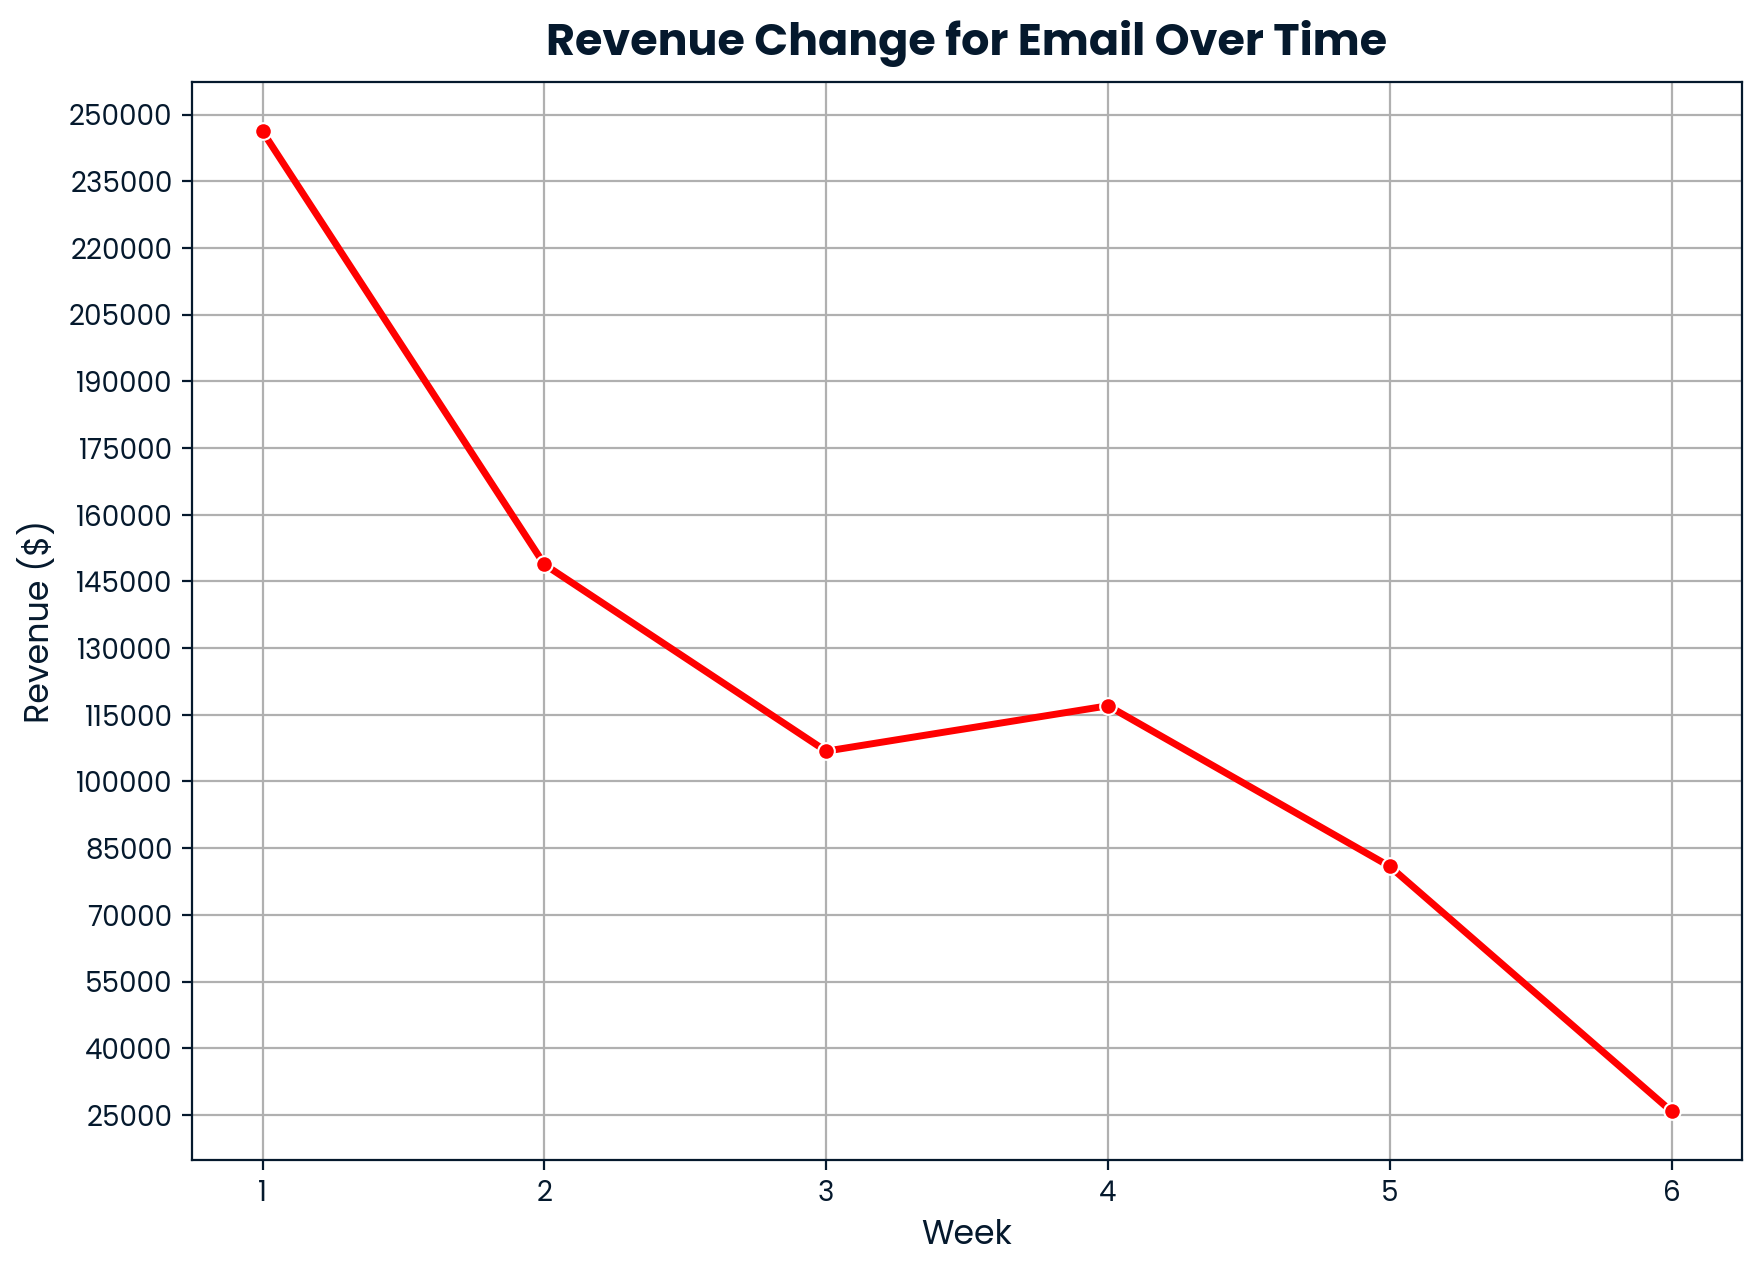

In [36]:
#Classified the data to only show Email sales method
email_df = df[df['sales_method'] == 'Email']
print(email_df.head())
#Grouped the email dataframe by week to show the weekly revenue change
email_revenue = email_df.groupby('week').agg({'revenue':'sum'})
print(email_revenue)
# Create the line plot
plt.figure(figsize=(10, 7))  # Set figure size
sns.lineplot(data=email_revenue, x='week', y='revenue', marker='o', color='red', linewidth=2.5)
plt.title('Revenue Change for Email Over Time', fontsize=16, pad=10, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.yticks(range(25000, 255000, 15000))
plt.grid(True)

    week  sales_method  ...           state  unit_price
1      6  Email + Call  ...          Kansas       15.03
17     6  Email + Call  ...       Wisconsin         NaN
21     1  Email + Call  ...        Michigan       14.32
22     3  Email + Call  ...  North Carolina       15.05
27     3  Email + Call  ...        Michigan       15.31

[5 rows x 9 columns]
        revenue
week           
1      19120.13
2      30815.63
3      54022.14
4      89591.00
5     147753.42
6     132684.67


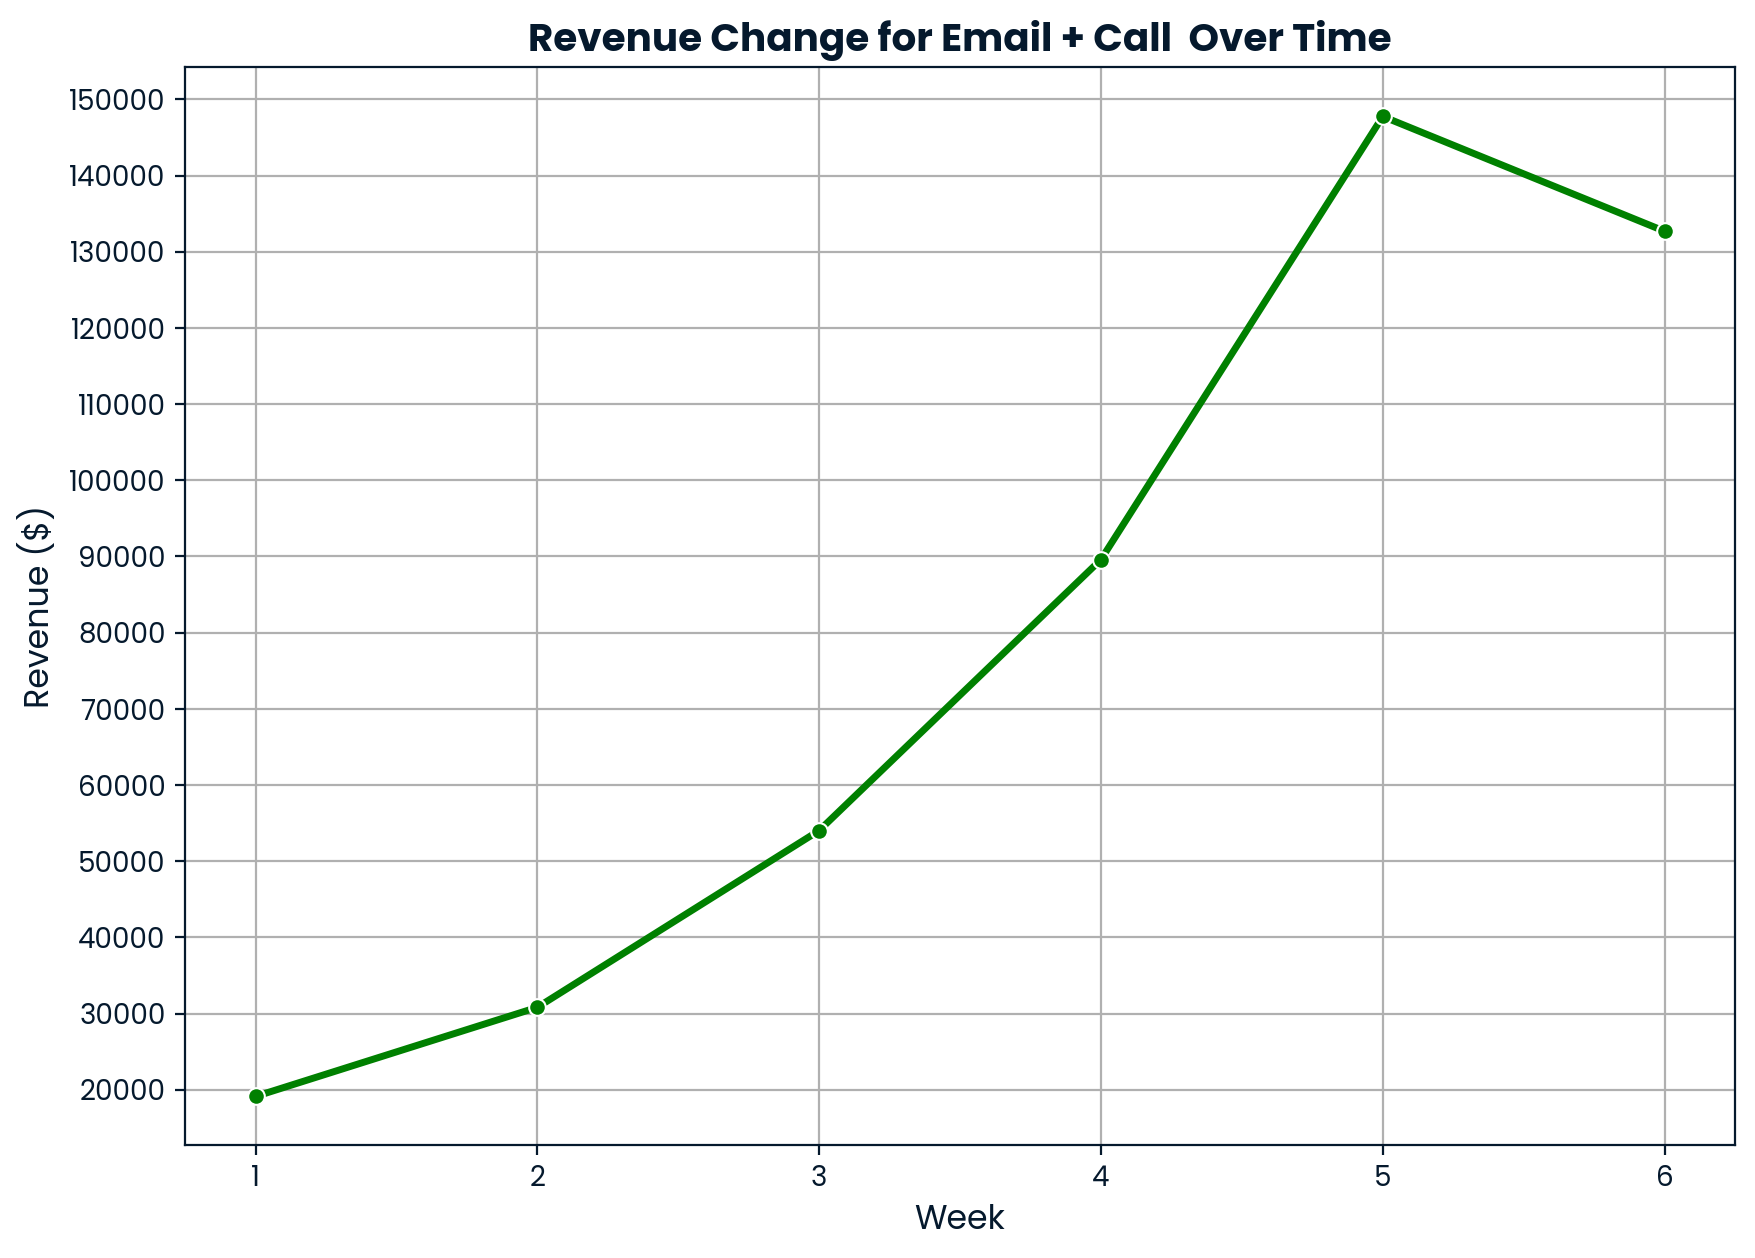

In [37]:
#Classified the data to only show Email & Call sales method
email_call_df = df[df['sales_method'] == 'Email + Call']
#Grouped the email + call dataframe by week to show the weekly revenue change
print(email_call_df.head())
email_call_revenue = email_call_df.groupby('week').agg({'revenue':'sum'})
print(email_call_revenue)
# Create the line plot
plt.figure(figsize=(10, 7))  # Set figure size
sns.lineplot(data=email_call_revenue, x='week', y='revenue', marker='o', color='green', linewidth=2.5)
plt.title('Revenue Change for Email + Call  Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.yticks(range(20000,155000,10000))
plt.grid(True)

The initial analysis indicates a general increase in revenue across all sales methods following the product launch. However, when comparing the methods collectively, the email-only approach has shown a steady decline in revenue over time. The call-only method has remained relatively stable, with no significant fluctuations. In contrast, the Email + Call method has demonstrated consistent growth, with revenue increasing gradually over the weeks before stabilizing after the fifth week.

Based on these findings, I recommend prioritizing the Email + Call method as it has shown the most sustained improvement in revenue performance.

    week  sales_method    revenue
0      1          Call   26796.72
1      1         Email  246202.61
2      1  Email + Call   19120.13
3      2          Call   35122.32
4      2         Email  148819.67
5      2  Email + Call   30815.63
6      3          Call   37647.85
7      3         Email  106826.04
8      3  Email + Call   54022.14
9      4          Call   51692.35
10     4         Email  117029.85
11     4  Email + Call   89591.00
12     5          Call   55516.07
13     5         Email   80900.37
14     5  Email + Call  147753.42
15     6          Call   29638.44
16     6         Email   25792.57
17     6  Email + Call  132684.67


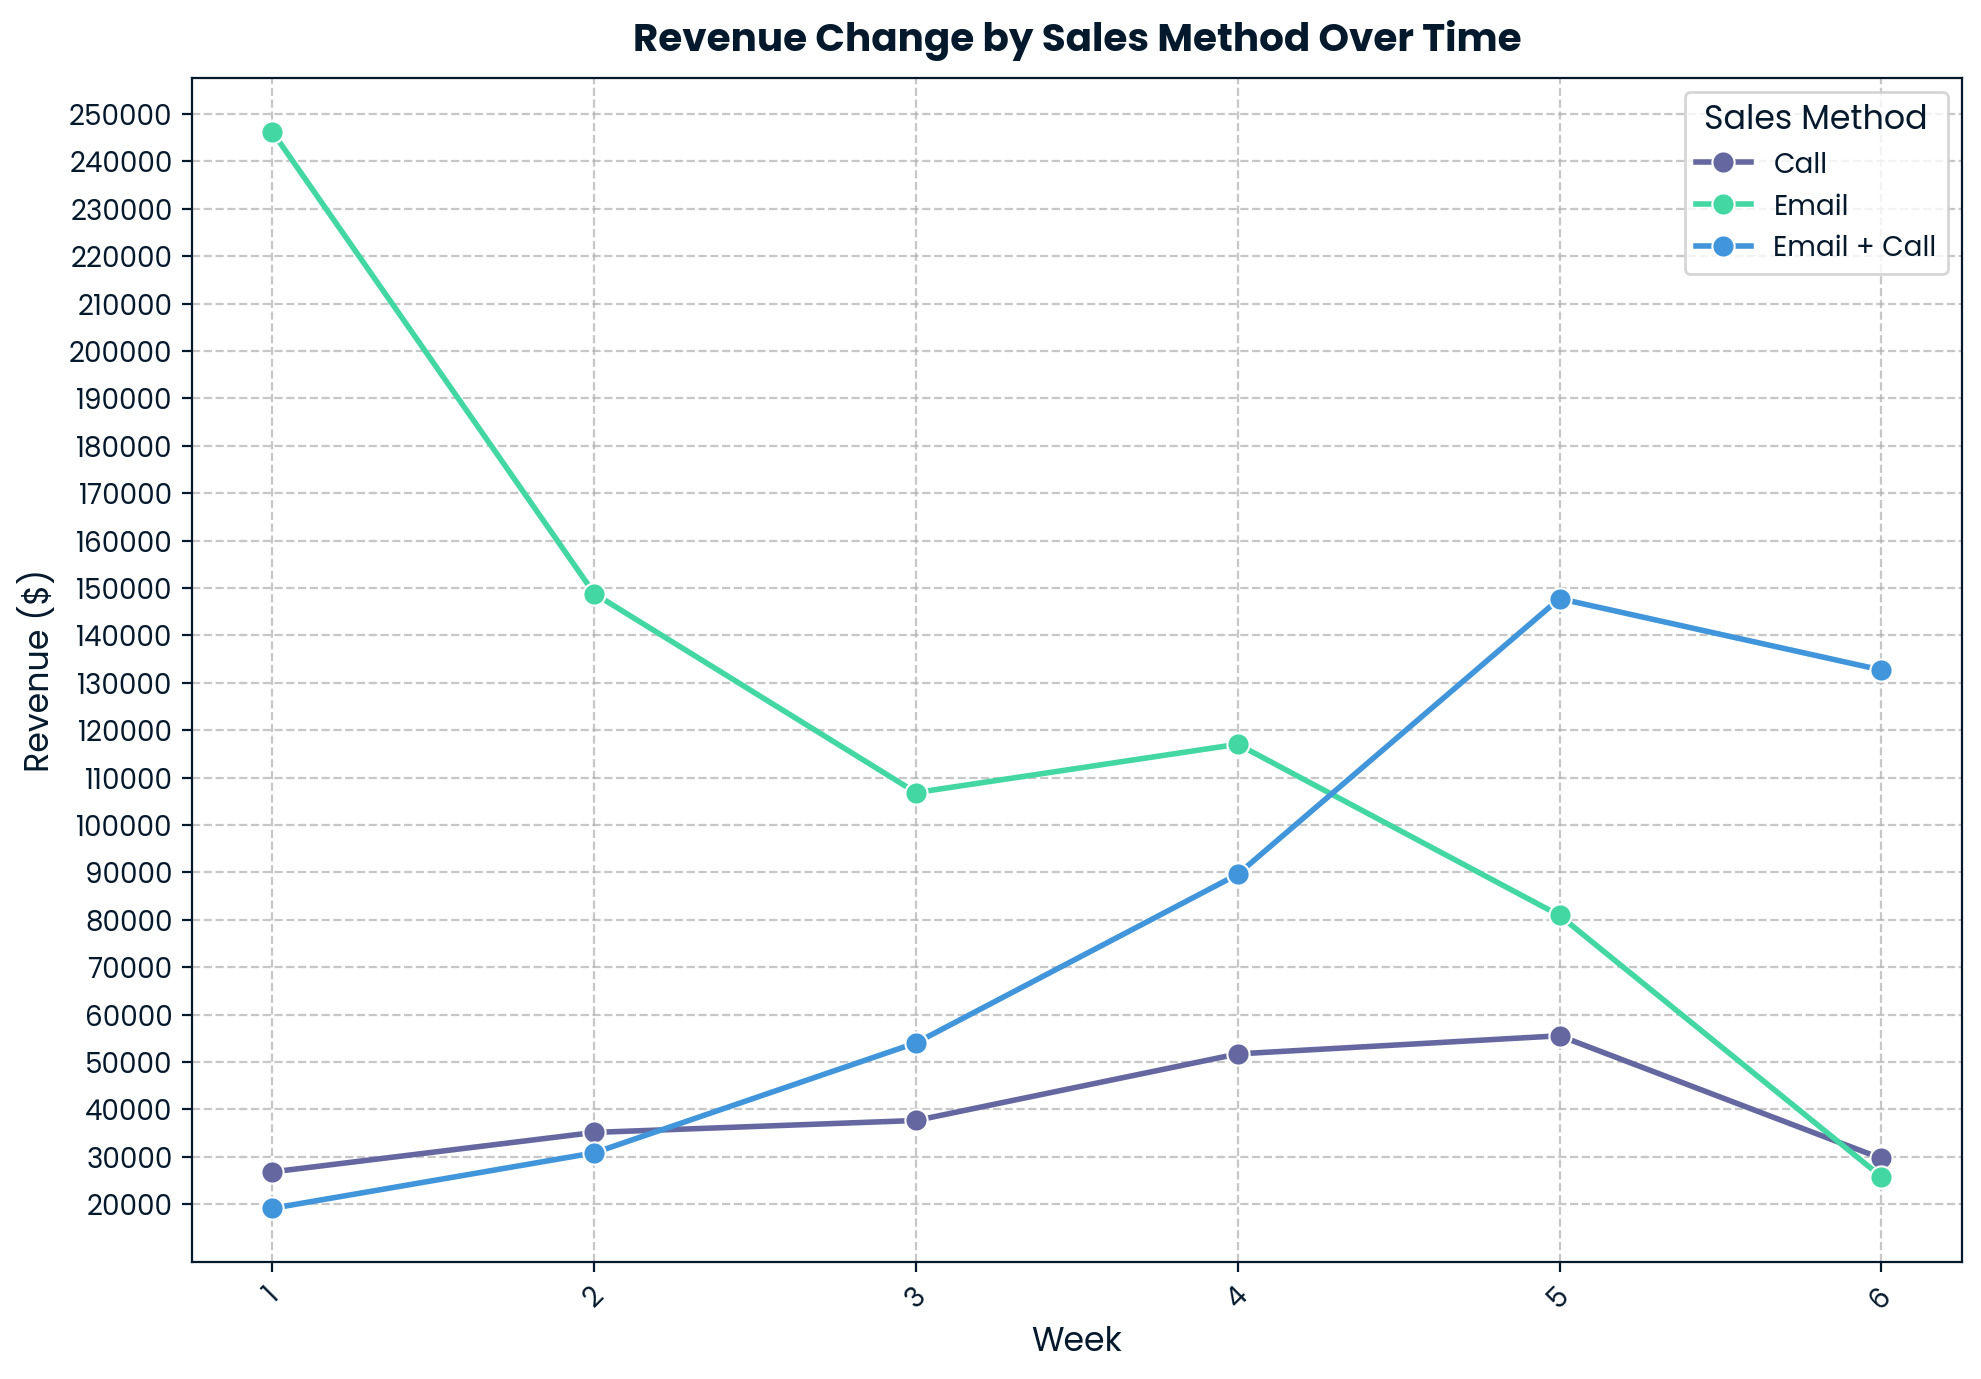

In [38]:
#Aggregating all the plots into one for side by side comparison.
plot_data = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
print(plot_data.head(18))
# Set figure size
plt.figure(figsize=(10, 7))

# Multi-line plot
sns.lineplot(data=plot_data, x='week', y='revenue', hue='sales_method', 
             linewidth=2, marker='o', markersize=8, ci=95)

plt.title('Revenue Change by Sales Method Over Time', fontsize=14, pad=10, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.yticks(range(20000, 260000, 10000))
plt.legend(title='Sales Method', title_fontsize=12, fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

                revenue  unique_customers   arpc
sales_method                                    
Email + Call  473986.99              2572  184.3
Email         725571.11              7466   97.2
Call          236413.75              4962   47.6


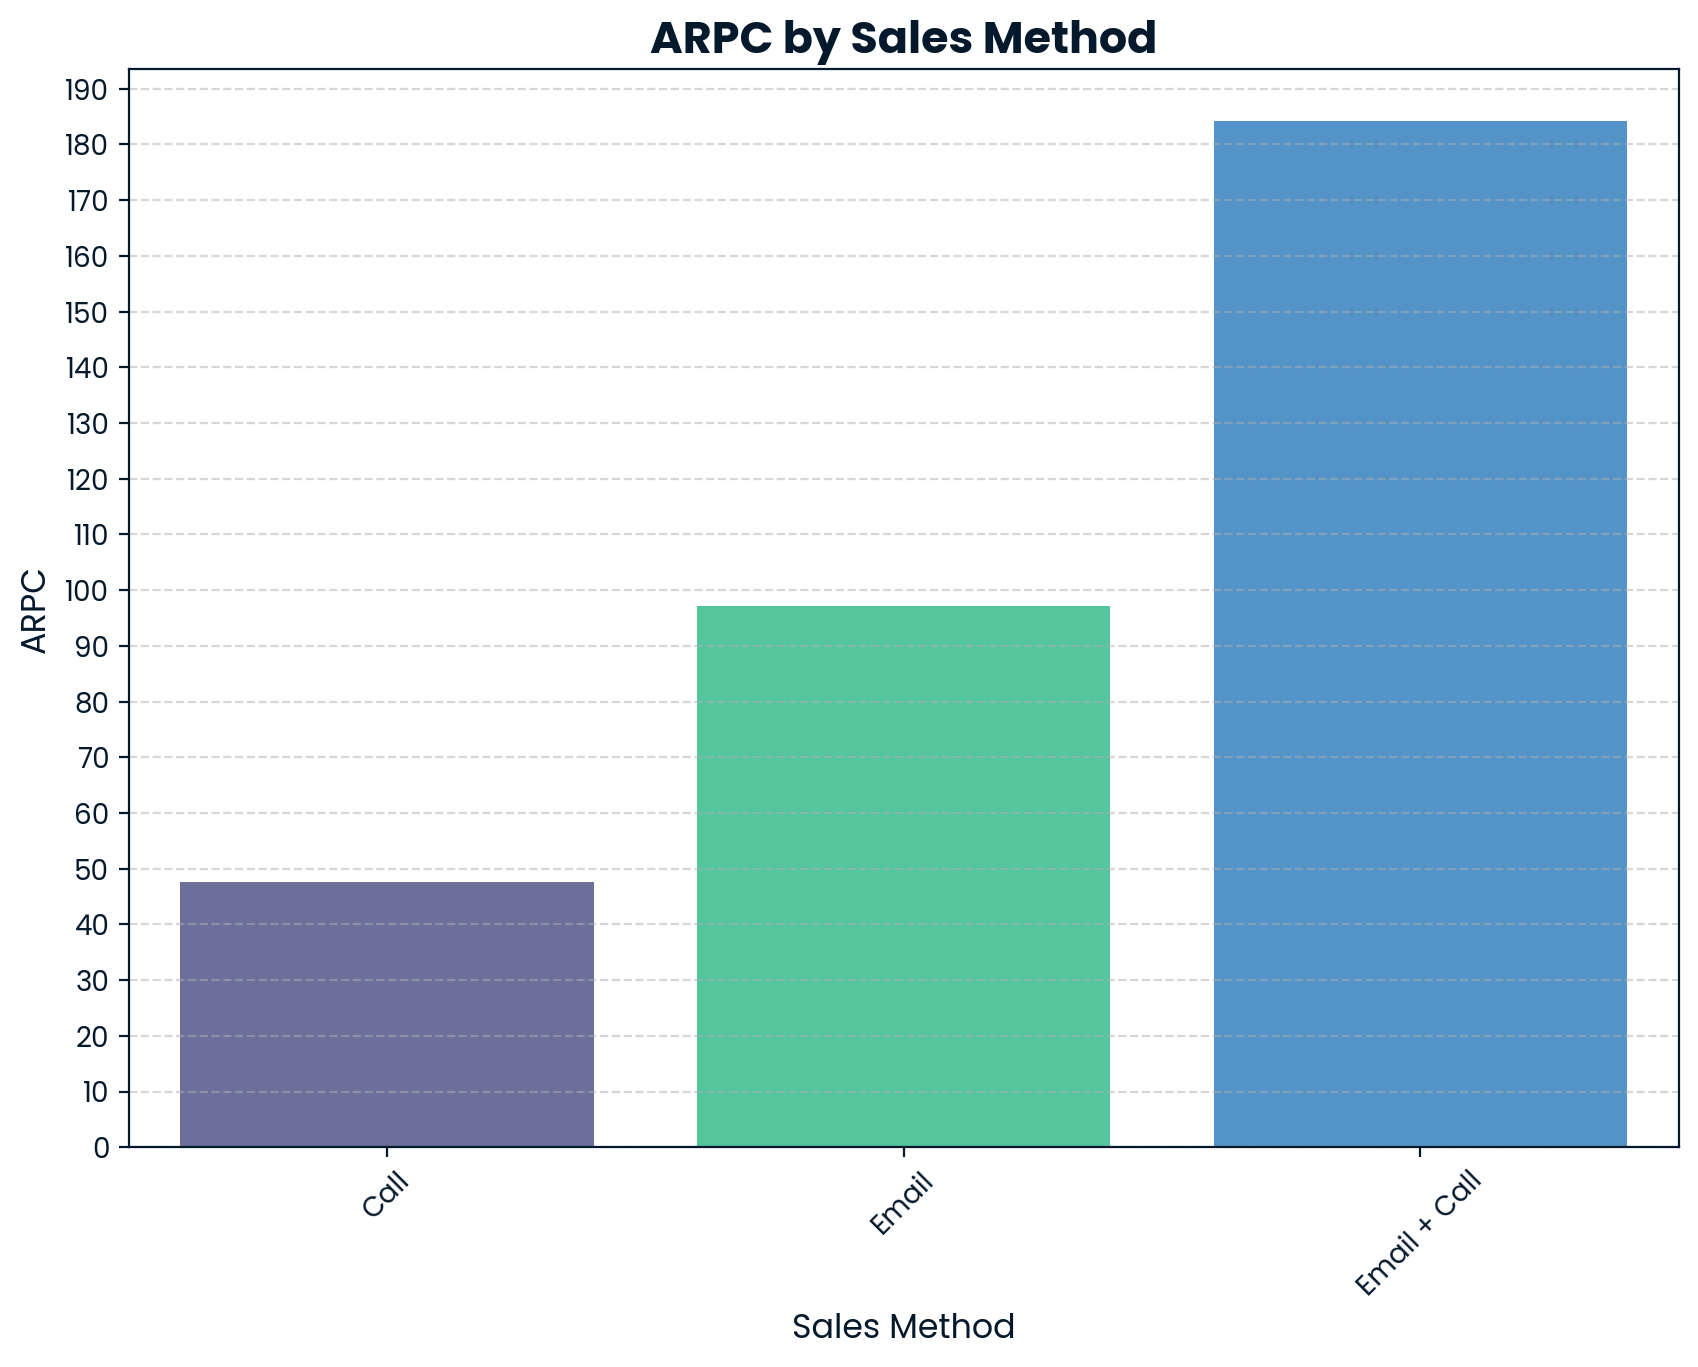

In [39]:
#Calcating ARPC for each sales method.
arpc_data = df.groupby('sales_method').agg({
    'revenue': 'sum',
    'customer_id': 'nunique'  # Unique customers
}).rename(columns={'customer_id': 'unique_customers'})
#Formula for Average Revenue Per Customer (ARPC)
arpc_data['arpc'] = round(arpc_data['revenue'] / arpc_data['unique_customers'],1)
print(arpc_data.sort_values(by='arpc', ascending=False))
arpc_data = arpc_data.reset_index()
plt.figure(figsize=(10,7))
sns.barplot(data=arpc_data, x='sales_method', y='arpc', hue='sales_method') 
plt.xlabel('Sales Method', fontsize=12)
plt.ylabel('ARPC', fontsize=12)
plt.title('ARPC by Sales Method', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(range(0,200,10))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

The most effective metric for the business to monitor is the Average Revenue Per Customer (ARPC), calculated as Total Revenue divided by the Number of Unique Customers. This metric provides a clear and actionable measure of revenue generation relative to customer acquisition and retention efforts.

## Benefits of ARPC as a Key Metric

Revenue and Reach Insights: ARPC addresses two critical questions simultaneously:
1. How many customers are being acquired through each sales approach?
2. What is the revenue distribution across these customers?
A higher ARPC indicates stronger revenue generation and more effective customer engagement.
Effort Efficiency: A sales method with a higher ARPC demonstrates greater efficacy and efficiency. By prioritizing such methods, the business can justify resource allocation and focus on strategies that deliver the highest returns.

## Use Cases for ARPC

- Trend Identification: ARPC should be monitored on a weekly basis to identify trends and assess the effectiveness of sales strategies over time.
- Target Setting: ARPC can serve as a benchmark for setting performance targets. If a sales method consistently fails to meet a predefined ARPC threshold, it should be reevaluated or adjusted.
- Resource Allocation: ARPC is a valuable tool for determining how resources should be allocated across different sales methods. Methods with higher ARPC should receive greater investment.
- Segment Analysis: ARPC can be used to perform detailed customer segment analysis. For example, long-term customers within the Email & Call sales method who exhibit a higher ARPC should be prioritized for targeted engagement and retention efforts.
By leveraging ARPC as a core metric, the business can make data-driven decisions to optimize sales strategies, enhance revenue generation, and improve overall operational efficiency.

# Final Summary &  Recommendations

## **SUMMARY:**

The analysis of sales approaches for the new product line reveals distinct performance patterns across Email, Call, and Email + Call methods.

Email reached the most customers (7466), generating 725571 dollars in revenue over 6 weeks. Its revenue peaked early (246,202 dollars in Week 1) and declined to 25792 dollars by Week 6. This method yielded an ARPC of 97 dollars/per customer.

Call engaged 4962 customers, generating 236,413 dollars in revenue, with a steady weekly revenue between the range of 26796 dollars to 55,516 dollars. It yielded the lowest ARPC at 47.6 dollars/per customer. 

Email + Call, despite targeting fewer customers (2572), generated 473986 dollars in total revenue. This revenue grew steadily from 19120 dollars in Week 1 to 147753 dollars in Week 5, with the highest ARPC at $184.3 dollars/per customer.

The proposed metric, Average Revenue Per Customer (ARPC), effectively measures revenue efficiency per method, with initial values of 97.2 (Email), 47.6 (Call), and 184.3 (Email + Call).

These findings suggest Email + Call maximizes revenue per customer and shows sustained growth, despite higher team effort, making it the standout approach. Email scales well initially but fades, while Call underperforms relative to effort.

## **RECOMMENDATIONS:**

- Prioritize Email + Call: Focus resources on this method, targeting high-value or newer customers, as its 184.3 ARPC and upward trend (Week 5 peak: 126809 revenue) justify the time investment for higher returns.
- Refine Email Strategy: Leverage Email’s broad reach ( 7466 customers) for initial outreach, but add follow-ups to sustain revenue beyond Week 1, boosting its 97.2 ARPC.
- Scale Back Call-Only: Limit Call to long-term clients (>10 years) where its 70 ARPC is stable, reducing effort on low-yield prospects.
- Monitor ARPC Weekly: Track ARPC per method (target > 100 for viability) to assess performance and adjust tactics— e.g., if Call drops below 60, phase it out.
- Investigate Customer Segments: Analyze ARPC by tenure or region to tailor methods, enhancing efficiency and informing future campaigns.